# Welcome to the Week 7 Project!

This week's course content provides you with the opportunity to implement what you have learned over the past six weeks using a new set of data!

Step 1: Please choose one of the following datasets and load it into this Jupyter Notebook. You will be using one of these datasets to build _either_ a classification model or a regression model.

* ___student-por.csv___ (classification problem; this is very similar to the student data we have previously worked with, but this time around, the "student-por.csv" dataset deals with students' grades _for a portuguese class_ as opposed to students' grades _for a math class_. Use the data in "student-por.csv" to build a classification model that predicts course passage or failure. The dataset is available at the following URL: https://archive.ics.uci.edu/ml/datasets/Student+Performance)


* ___Concrete_Data.xls___ (regression problem; the goal with this dataset is to use its eight features to predict concrete compressive strength. This is similar to how we built a regression model that used car model-specific attributes (e.g., weight, horsepower, engine cylinders, etc.) to predict that same car model's MPG. The dataset is available at the following URL: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength.


Step 2: Complete a "description" of the data. This is a high-level investigation of the dataset akin to what we have done in lecture Notebooks over the previous weeks.

Step 3: Complete an "exploration" of the data. This is a more in-depth investigation of the dataset ___involving the use of plots___. Again, this is highly analogous to what we have done in lecture Notebooks over the previous weeks.

Step 4: Construct __two__ models using your chosen dataset. For example, if you choose to work with the classification dataset, build a decision tree model __and__ a logistic regression model. If you choose to work with the regression dataset, build a linear regression model __and__ a neural network ___or___ a decision tree regression model.

Step 5: Evaluate the performance of the two models using the metrics and diagnostics we utilized in class.

Step 6: Describe and interpret the models:
- Which features did each model use/select via regularization or splitting? Note that we did not cover methods to determine which features had the greatest effect on predictions in a neural network after applying regularization (as such, you can skip this question if you build a neural network).
- What does each model tell us about the underlying dataset? For example: are students more likely to fail the Portuguese course if they drink on the weekend? Do increased amounts of fly ash in concrete increase its compressive strength?
- (You are not being asked to answer these specific questions. The questions listed above are simply examples of the _kinds_ of questions you will want to answer when describing and interpreting your models.)


### Grading
_This assignment will be weighted the same as a weekly quiz. Simply apply the code, methods, and concepts we have learned in class, and with effort and understanding on your part, you should be fine._

_Use your own words and code (__of course you can modify and use code from the course__; it is usually pretty self-evident when someone is copying a definition or pasting-in code they found on Stack Overflow)._

## Step 1: Load the Data Below

First, we import all libraries, packages, modules, etc. necessary for data description/exploration, data visualization, predictive modeling, etc.

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import itertools

from sklearn.metrics import accuracy_score, classification_report, \
confusion_matrix, roc_curve

# Importing logistic regression-specific modules, functions, etc.:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, \
LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Importing decision tree-specific modules, functions, etc.:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import graphviz
import joblib

%matplotlib inline

We then import our input data file, "student-por.csv", into pandas:

In [2]:
# Note that output of `glob.glob()` is inherently a list (even if said 
# `glob.glob()` invocation only returns a single file name):
csvFileList = glob.glob("*.csv")

# Obtaining first (and only) file name stored in `csvFileList` list, and 
# then using `os.path.abspath` to obtain absolute file path cor-
# responding to said file name:
file_path = os.path.abspath(csvFileList[0])

# Loading the input data into a pandas DataFrame bound to the
# variable name "input_df"; passing ";" to the `sep` argument of
# the `.read_csv()`  method because our input dataset is semicolon-
# delimited:
input_df = pd.read_csv(file_path, sep=';')
# Verifying that our DataFrame's output appears normal:
input_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Visual assessment of the first five rows of the "input_df" DataFrame as outputted above suggest that "student-por.csv" has been imputted into pandas without fault. We may now proceed to high-level data description.

## Step 2: Describe the Data Below

We start the data description process with perhaps the most rudimentary action: ascertaining the number of samples and features, as well as the number of non-null values for each feature, present within the "input_df" DataFrame:

In [3]:
# Outputting the feature names for the "input_df" DataFrame, as well
# as the datatype structuring applied to each value within each
# individual feature:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Visual analysis of the "input_df" DataFrame's contents suggests that the values within each feature are structured as would be expected per [the input dataset's documentation](https://archive.ics.uci.edu/ml/datasets/Student+Performance) (e.g., the "G1", "G2", and "G3" features being of data type "int64" is expected since the dataset's documentation states that all values in these features should be numeric). This conclusion allows us to infer that no outlier values are present within the "input_df" DataFrame. 

Next, we use the `.describe()` method to visually inspect summary-level statistics for each numeric feature in the "input_df" DataFrame:

In [4]:
input_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Visual inspection of summary-level statistics (in particular, the values in the "min" and "max" rows) for each numeric feature support our previous inference that no outlier values are present within the "input_df" DataFrame.

## Step 3: Explore the Data Below

Before diving deep into data exploration, we will drop the "G1" and "G2" features from the "input_df" DataFrame since our intent is to predict the values contained in the "G3" feature **without** using students' grades for the first and second half of the course as input data.

To do this, we use the `.drop()` method as shown in the code cell below:

In [5]:
# Using the `.drop()` method to "drop" the "G1" and "G2" features
# from the "input_df" DataFrame; we pass 1 to the `axis` argument to
# specify that we want columns - not rows - named "G1" and "G2"
# dropped from our DataFrame; the `inplace` keyword argument allows
# us to update our DataFrame "in-place":
input_df.drop(['G1', 'G2'], axis = 1, inplace = True)
input_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13


Visual examination of the first five rows of the "input_df" DataFrame as outputted above suggest that the "G1" and "G2" features have been "dropped" from the DataFrame as intended. We may now proceed to high-level data description.

We shall add a "pass" feature to the "input_df" DataFrame that indicates whether a student passed the Portuguese course. We do so because the goal of our predictive modeling is to correctly forecast, for each student, the probability of Portuguese course passage _based on the data at our disposal_.

Any grade value within the "G3" feature greater than _or equal to_ an integer value of 10 is considered a passing grade. Any grade value within the "G3" feature less than 10, on the other hand, is considered a failing grade.

In [6]:
# Creating a feature named "pass" in the "input_df" DataFrame whose
# value for every row is 0:
input_df["pass"] = 0
# Updating the "pass" feature such that if the value at the inter-
# section of a given row and the "G3" feature is greater than or
# equal in value to 10, the value at the intersection of that
# specific row and the "pass" feature is updated from 0 to 1:
input_df.loc[input_df["G3"] >= 10, "pass"] = 1
input_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,1


We see through our call to the `.head()` method that the "pass" feature has been added to the end (read: the side furthest to the right) of our DataFrame and populated with values accordingly.

Prior to any further data exploration, we will separate the data contained in the "input_df" DataFrame into training and testing datasets (with each dataset contained within its own dedicated DataFrame).

In [7]:
# "train_df" and "test_df" are DataFrames to be instantiated from
# our "input_df" DataFrame by the `train_test_split()` function;
# `test_size=.20` instructs that 20% of the rows in the "input_df"
# DataFrame be allocated toward the "test_df" DataFrame as testing
# data; the `random_state` keyword argument initializes the random
# selection of rows that will constitute "test_df":
train_df, test_df = train_test_split(input_df, test_size=0.20,\
                                     random_state=0)

# Printing the resulting DataFrames' shapes to verify that both
# resulting DataFrames contain the same number of features, as well
# as that the "test_df" DataFrame's rows are roughly 20% of the
# original total quantity of rows in the original input dataset
# (649):
print(train_df.shape)
print(test_df.shape)

(519, 32)
(130, 32)


We now perform preliminary exploration of the "G3" feature in the "train_df" DataFrame (the "G3" feature served as the basis for the "pass" feature, which is our _target_ feature (i.e., the feature whose values we are attempting to forecast through predictive modeling)).

Recall that the "G3" feature contains an integer value from 0 to 20. Any grade value within the "G3" feature greater than or equal to 10 is considered a passing grade for the Portuguese course while any grade value within the "G3" feature less than 10 is considered a failing grade for the Portuguese course.

In [8]:
train_df["G3"].describe()

count    519.000000
mean      11.847784
std        3.355102
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

A potentially interesting insight gleaned from this particular call to the `.describe()` method is that the mean of all values in the "G3" feature is _slightly_ above the threshold for a passing grade (i.e., 10) in the Portuguese course.

We now progress to _visualization-driven_ data exploration. We commence with a bar plot of the values in the "G3" feature in our "train_df" DataFrame:

Text(0.5, 0, 'Final Grade Value')

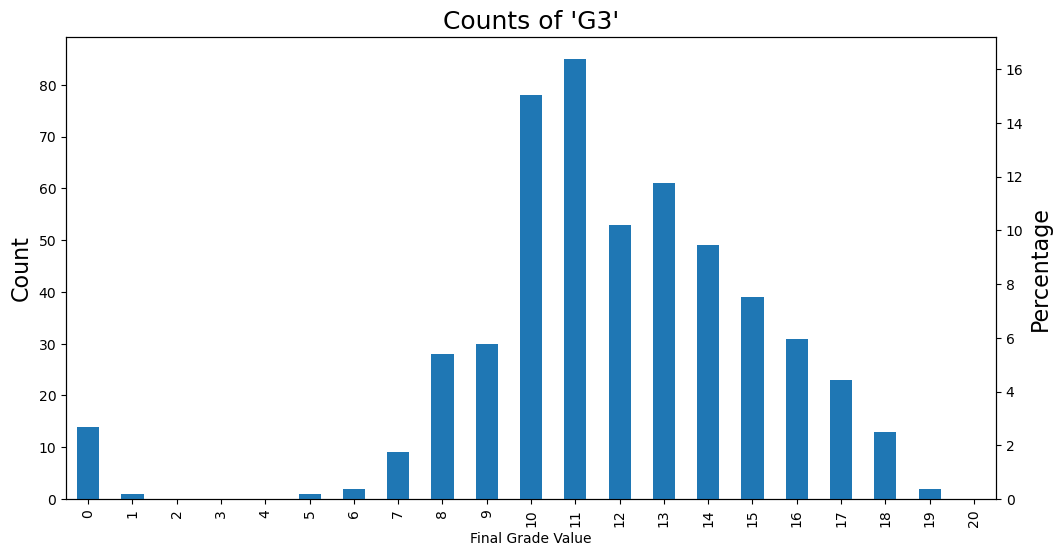

In [9]:
# Obtaining counts for each unique value contained in the "G3"
# feature and returning the counts to the pandas Series bound to the
# variable name "grade_counts":
grade_counts = train_df["G3"].value_counts()

# Looping through a range of integers from 0 to 21 (non-inclusive
# of 21); if `g` is not found in the index of the `grade_counts`
# pandas Series (as will ultimately be the case when `g` assumes
# successive values of 2, 3, 4, and 20), then that value for `g`
# will be added to the `grade_counts` pandas Series' index as well
# as a value of 0 for that new element in the pandas Series:
for g in range(0, 21):
    if g not in grade_counts.index:
        grade_counts.loc[g] = 0

# Sorting, using the `.sort_index()` method, the `grade_counts`
# pandas Series once again (`inplace=True` allows us to update a
# pandas Series/DataFrame "in-place", meaning that we do not have
# to bind the output Series/DataFrame to a new variable name):
grade_counts.sort_index(inplace=True)

# Instantiating a bar plot based on the counts for each unique
# value in the `grade_counts` pandas Series; also, creating a "twin"
# x-axis that allows us to demonstrate the percentage of total
# values that each unique value in the "G3" feature represents:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
grade_counts.plot(ax=ax1, kind='bar')
ax2 = ax1.twinx()

# Obtaining the number of rows contained in the "G3" feature in the
# "train_df" DataFrame (calling the `.shape` attribute on any pandas
# DataFrame/Series will return a tuple whose first element is the
# number of rows in the DataFrame/Series):
nrows = train_df['G3'].shape[0]
# Obtaining the share, as a percentage value, of the total values
# that each unique value in the "grade_counts" pandas Series
# represents (and assigning the output pandas Series to the
# variable name "grade_count_prcts"):
grade_count_prcts = grade_counts/nrows * 100
# Visualizing, as the second/overlaid bar plot in the visualization
# below, the pandas Series bound to the variable name "grade_count_-
# prcts":
grade_count_prcts.plot(ax=ax2, kind='bar')

# Setting plot labels:
ax1.set_title("Counts of 'G3'", fontsize=18)
ax1.set_ylabel("Count", fontsize=16)
ax2.set_ylabel('Percentage', fontsize=16)
ax1.set_xlabel('Final Grade Value')

Looking at this bar plot, it appears that the value distribution for the "G3" feature - at least within the "train_df" DataFrame - is right-skewed.

The group of students who received a 0 as their final grade for the Portuguese course also appears to be an outlier, but not an enormous one. It _may_ end up being the case that we do not want to include data for students who received a 0 as their final grade in the training dataset because these values may contaminate the model training process.

We will make significant use of the "pass" feature since our fundamental goal is to create a model that will predict whether a given student will pass the Portuguese course (stated differently, becoming visually acquainted with the overall "pass/fail" rate for the dataset before progressing further into our data exploration efforts should be helpful). As such, our next step will be to visualize the pass/fail rate for each student described in the "train_df" DataFrame:

Text(0.5, 1.0, '83.62% Pass')

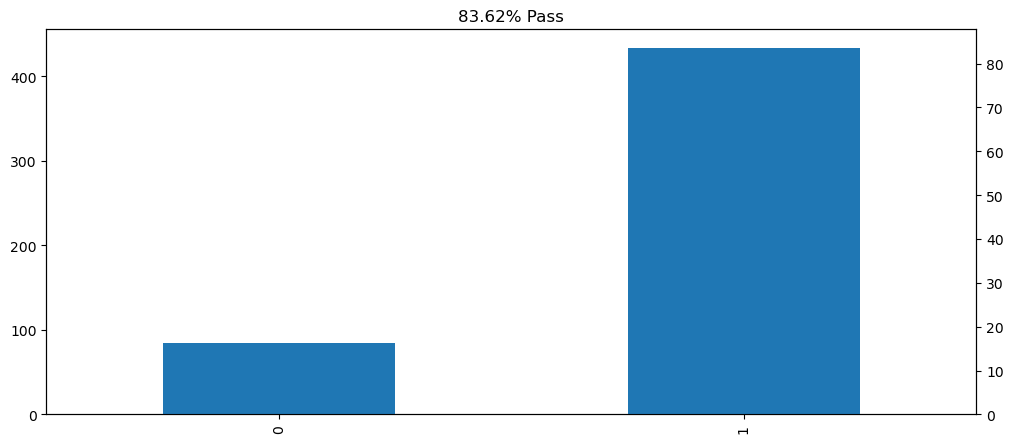

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 5))
# Obtaining the count of each unique value in the "pass" column
# (in the "pass" column, 1 represents passing the course and 0 rep-
# resents failing the course), sorting these counts by the values'
# indices, and then visualizing the counts for each value via a bar
# plot:
train_df['pass'].value_counts().sort_index().plot(kind='bar',
                                                  ax=ax1)
# Creating, via the `.twinx()` method, another AxesSubplot, "ax2",
# that shares its x-axis with the "ax1" AxesSubplot:
ax2 = ax1.twinx()
# Obtaining the percentage equivalent of the counts for each unique
# value in the "pass" column:
pass_fail_prct = (train_df['pass'].\
                  value_counts().sort_index()/nrows) * 100
# Plotting the percentage equivalent of the counts for each unique
# value in the "pass" column:
pass_fail_prct.plot(kind='bar', ax=ax2)

ax1.set_title('{:.2f}% Pass'.format(pass_fail_prct[1]))

It would seem that the Portuguese course's pass rate is remarkably high (at least when compared to the 66.77% pass rate we encountered for the math class over the course of our weekly lectures).

Visualizing the value distributions for other features may provide further insights and context that shape our understanding of the dataset. As such, we dive into said visualizations in the code cells below ___[note that any feature-specific value distribution visualization not considered to provide any insights or raise significant questions have been omitted from this Notebook out of concern for Notebook length]___:

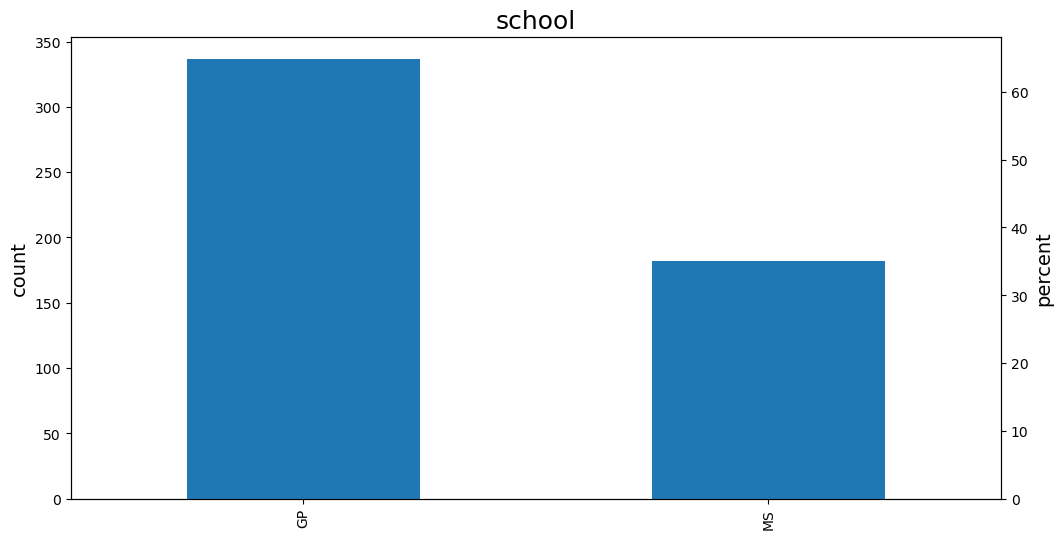

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["school"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("school", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["school"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

It seems that almost two thirds of records in "train_df" pertain to the school "GP" (short for "Gabriel Pereira"). It may benefit us to  explore whether or not a potential relationship exists between the "school" value for a given student described in the dataset and that same student's probability of passing the Portuguese course. _Such deeper scrutiny, if found to be necessary, would occur __after__ the value distributions for all features in "train_df" have been visually analyzed for anomalies and other items of note_.

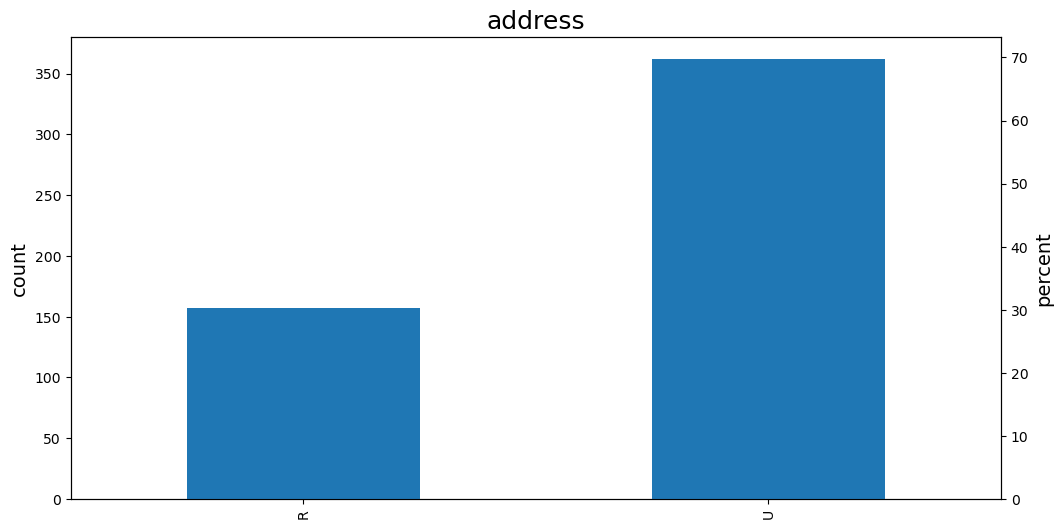

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["address"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("address", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["address"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

The value distribution for the "address" feature indicates that approximately 70% of students detailed in "train_df" live in urban urban areas as opposed to rural areas. Perhaps there is a potential relationship between a given student's home address and that same student's probability of passing the Portuguese course (perhaps a result of, for example, lower access to academic resources such as tutoring outside of city centers)?

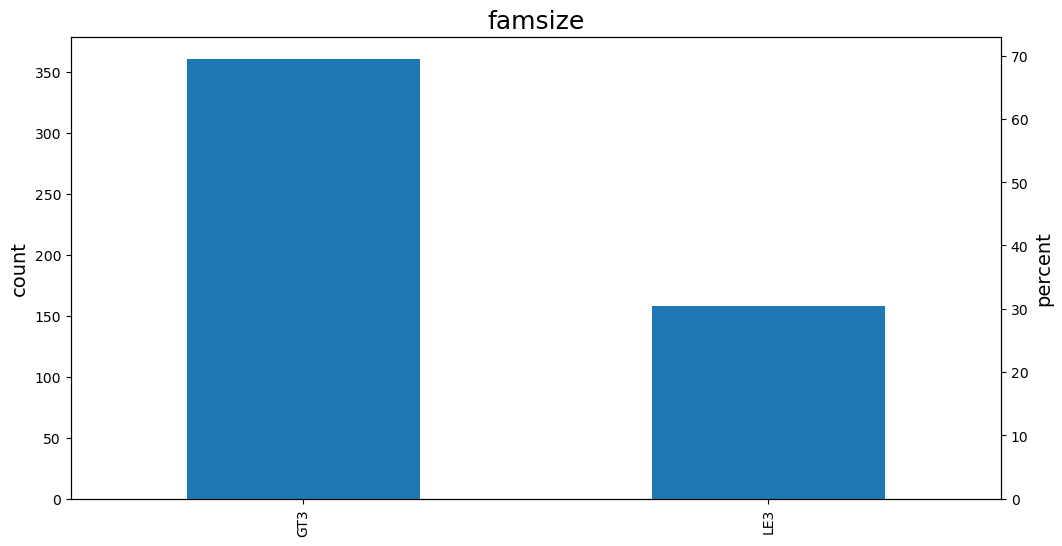

In [13]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["famsize"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("famsize", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["famsize"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Looking at the value distribution for the "famsize" feature, is there any sort of possible relationship between family size and course passage for a given student? Intuition suggests that smaller family size (i.e., "LE3", which indicates a family size of less than or equal to three persons) _might_ be more conducive to academic success, but perhaps the dataset will ultimately suggest otherwise?

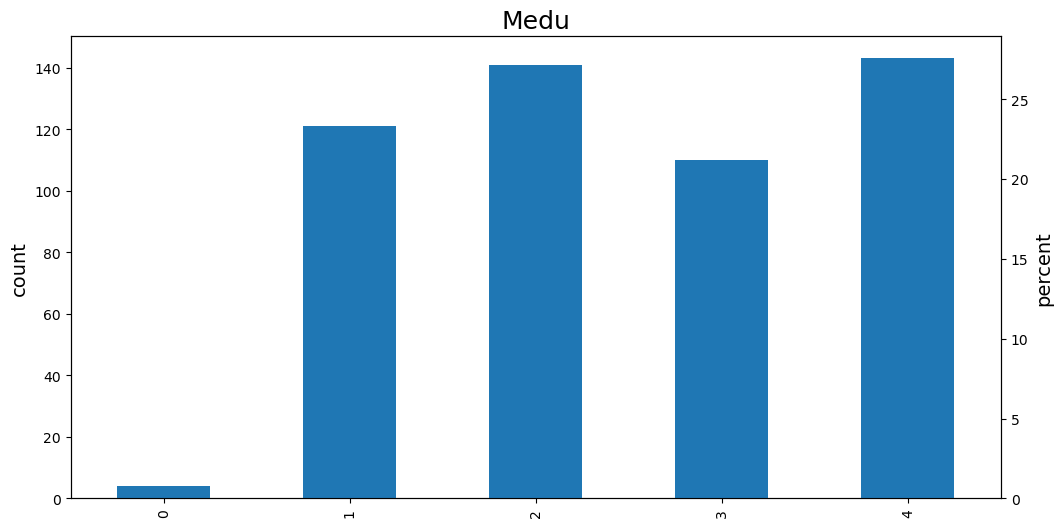

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["Medu"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("Medu", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["Medu"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

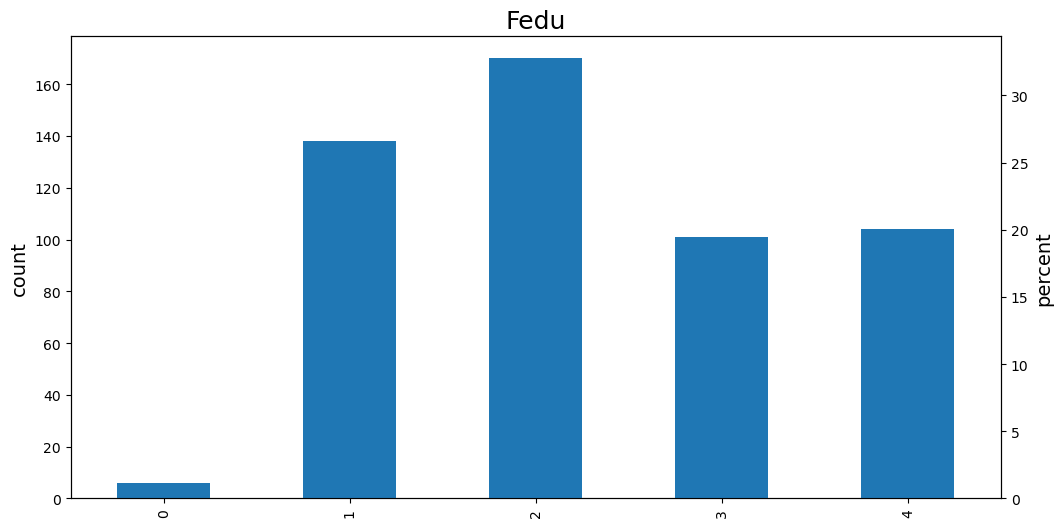

In [15]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["Fedu"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("Fedu", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["Fedu"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

When comparing the value distribution for the "Medu" feature to the value distribution for the "Fedu" feature, it is interesting that there is a higher proportion of students' mothers who have completed secondary education or higher (i.e., the almost 50% of rows in the "train_df" DataFrame that have a value of 3 or 4 for the "Medu" feature) than students' fathers who have done the same (just under 40%). _This observed difference may not be statistically significant._

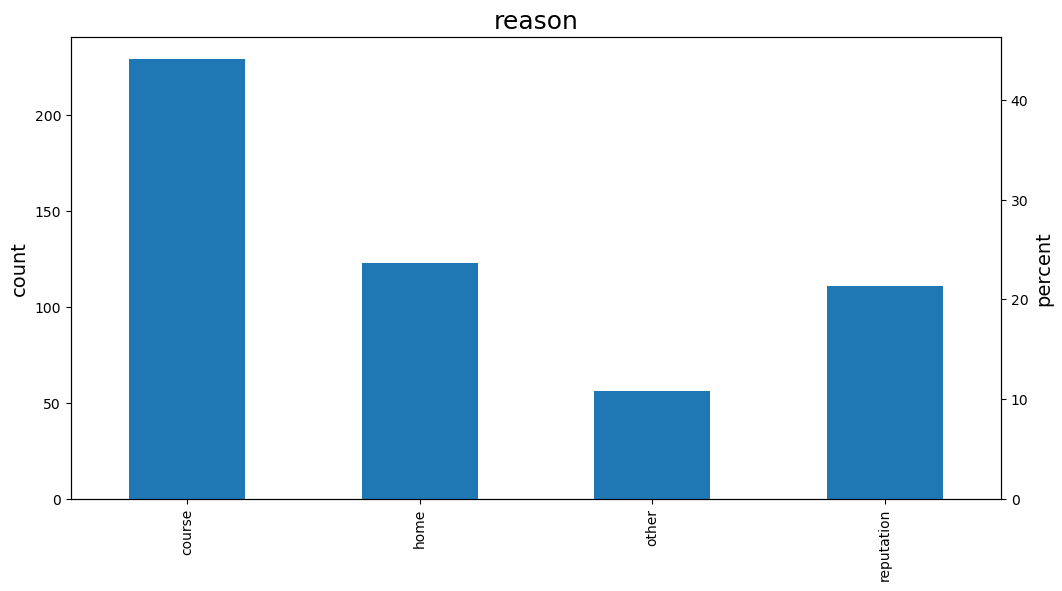

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["reason"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("reason", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["reason"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Somewhat astonishingly, over 40% of students described in the "train_df" DataFrame chose to attend their school because of their desire to take this particular Portuguese course. Active student interest in the Portuguese course _may_, for whatever reason, be related to the high observed course passage rate. 

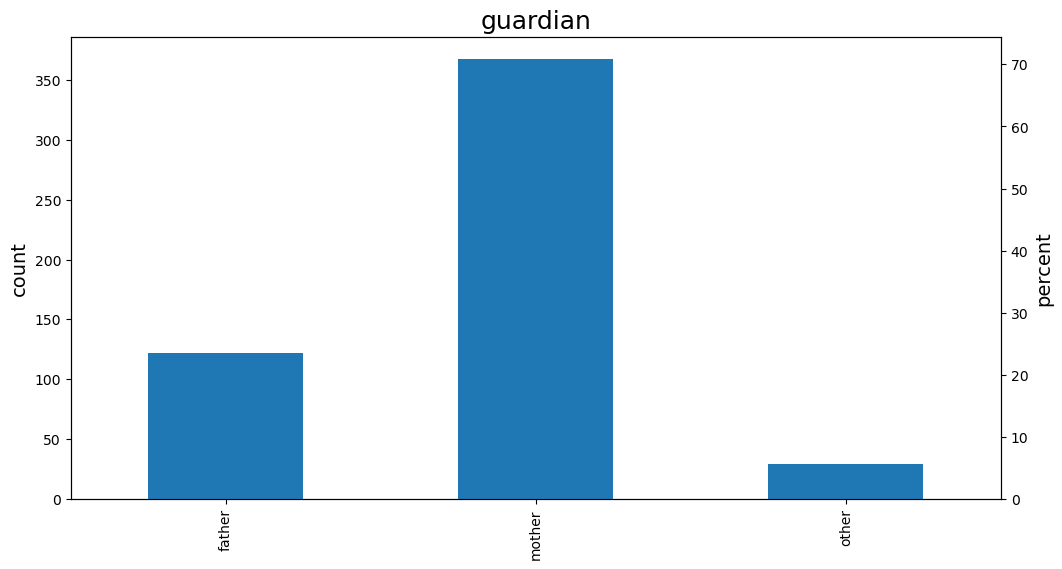

In [17]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["guardian"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("guardian", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["guardian"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Not exactly unexpected, but maybe significant in some form that 70% of students described in the "train_df" DataFrame identify their mother as their "guardian".

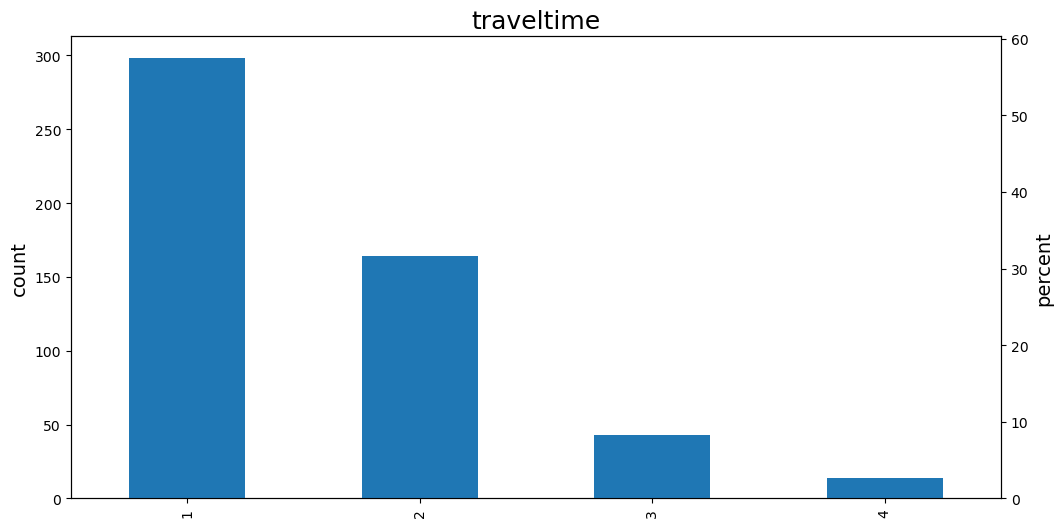

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["traveltime"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("traveltime", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["traveltime"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Not only is the value distribution for the "traveltime" feature right-skewed, but also of significance is that over 80% of students described in the "train_df" DataFrame (i.e., those rows in the "train_df" DataFrame that have a value of 1 or 2 for the "traveltime" feature) can get to their school in 30 minutes or less. _Could a positive correlation potentially exist between a student's proximity to their school and their odds of passing the Portuguese course_?

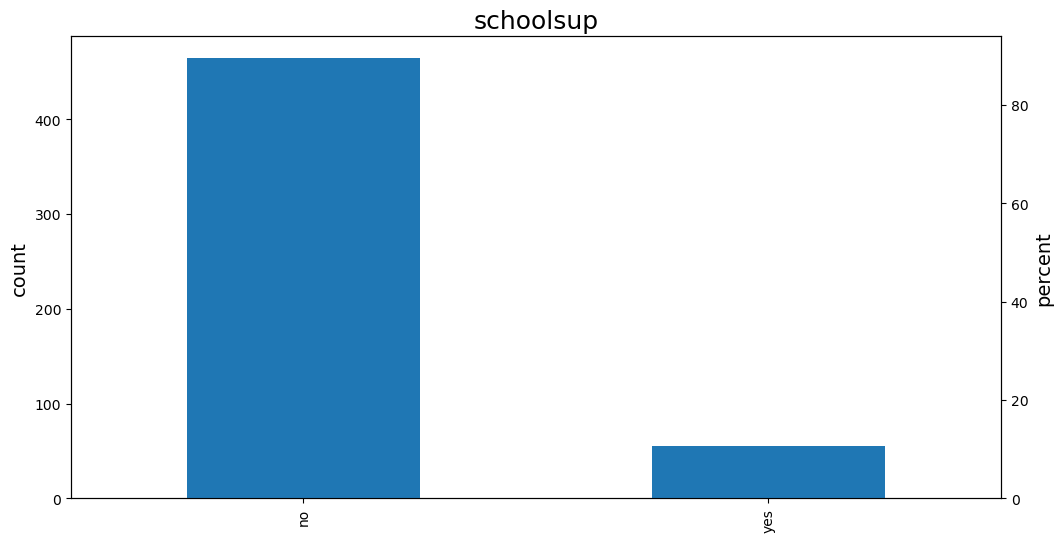

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["schoolsup"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("schoolsup", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["schoolsup"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

The vast majority (i.e., greater than 80%) of students described in the "train_df" DataFrame did not make use of any extra educational support. This finding _may_ be relevant in the context of the Portuguese course's relatively high passage rate.

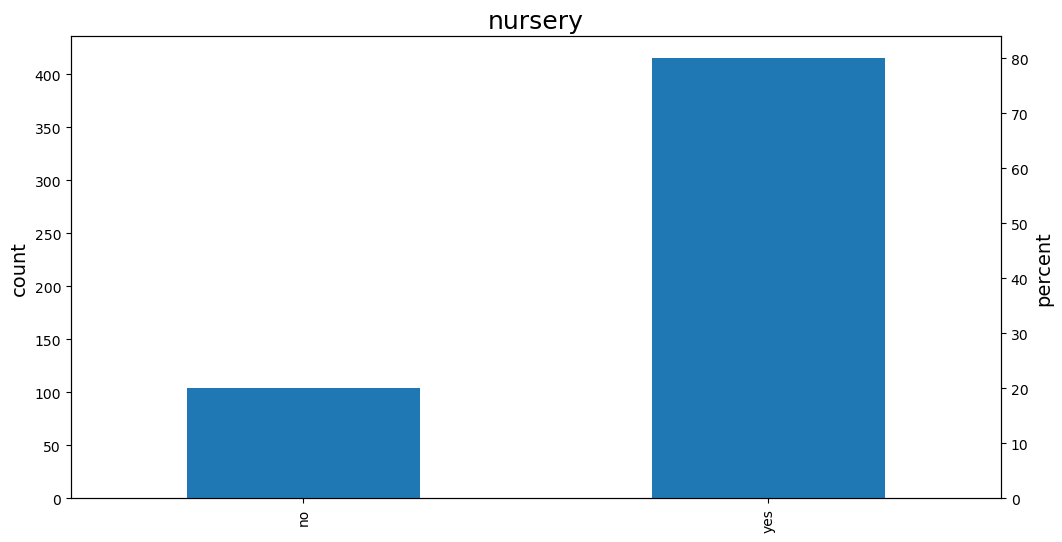

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["nursery"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("nursery", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["nursery"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

The overwhelming majority (i.e., about 80%) of students described in the "train_df" DataFrame attended nursury school in some capacity. Intuition (which could very well be misguided) suggests that those students who attended nursery school _may_ experience greater academic success in general.

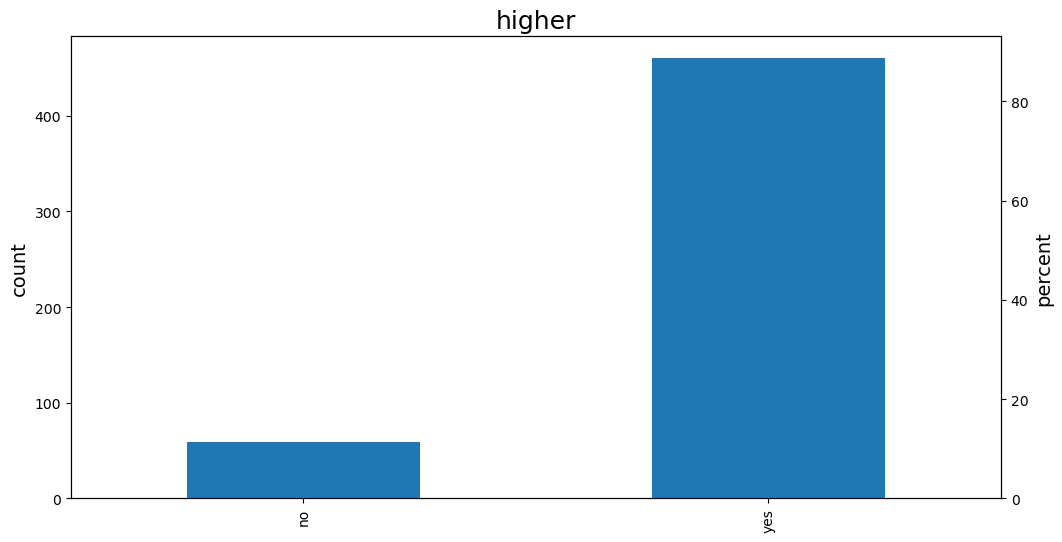

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["higher"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("higher", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["higher"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Perhaps unsurprisingly (given our exploration of features' value distributions thus far), an overwhelming majority (i.e., approaching 90%) of students described in the "train_df" DataFrame are interested in post-secondary education. Intuition would suggest that those students described in "train_df" who are interested in pursuing higher education would be more motivated to pass the Portuguese course.

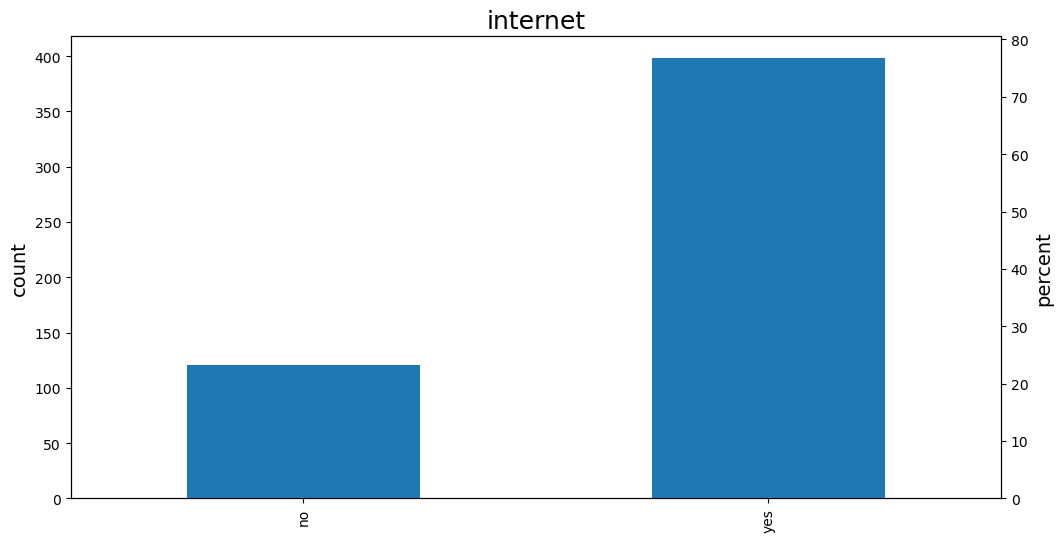

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["internet"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("internet", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["internet"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

A remarkably high proportion of the students described in the "train_df" DataFrame have access to the Internet at home. Such a resource _might_ be related to the high course passage rate among the students described in the "train_df" DataFrame.

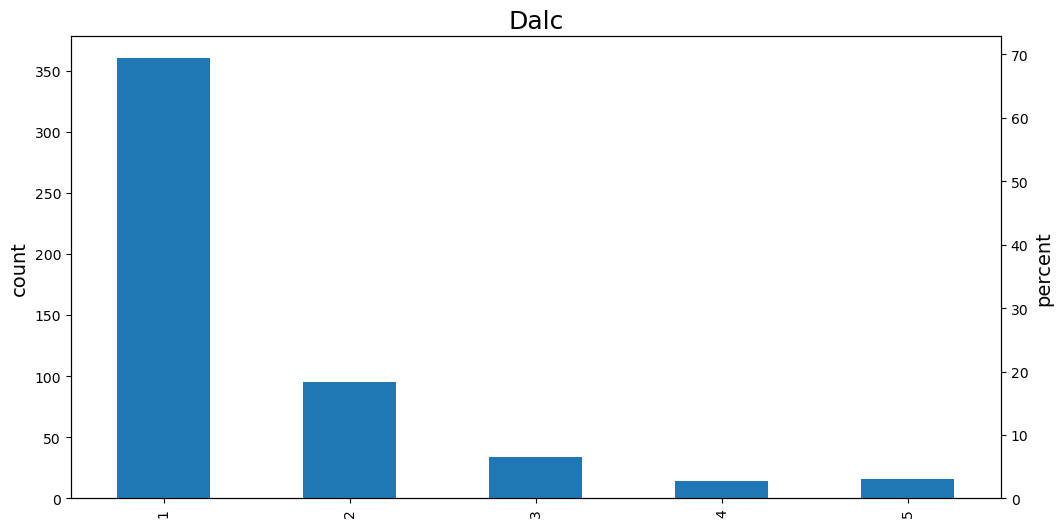

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["Dalc"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("Dalc", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["Dalc"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Approximately 70% of students (i.e., those rows in the "train_df" DataFrame that have a value of 1 for the "Dalc" feature) report "very low" alcohol consumption during the work week. For a group of students in which an overwhelming majority (i.e., approaching 90%) are interested in post-secondary education, this insight does not seem surprising.

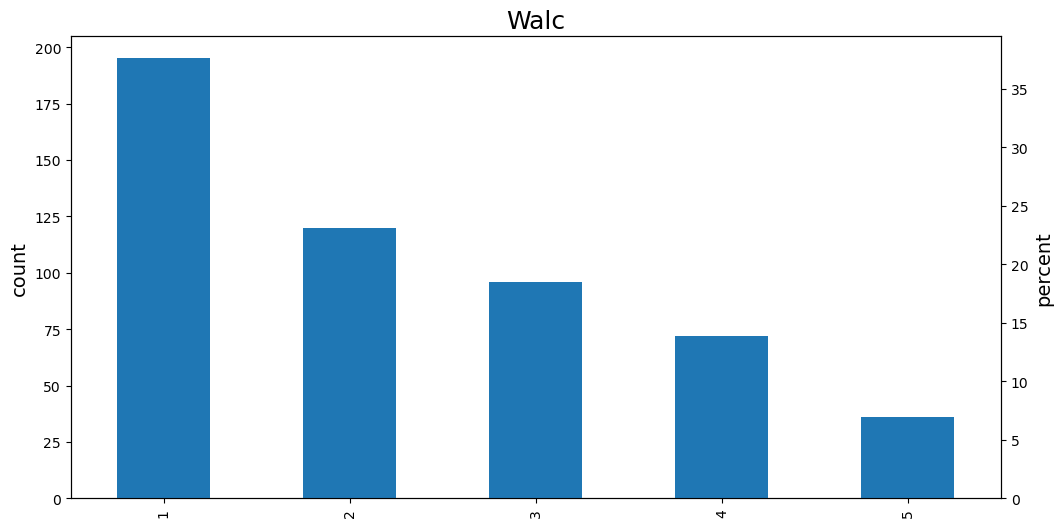

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["Walc"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("Walc", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["Walc"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Around 60% of students described in the "train_df" DataFrame (i.e., those rows in the "train_df" DataFrame that have a value of 1 or 2 for the "Walc" feature) report/exhibit "low" or lower weekend alcohol consumption. For a group of students in which approximately 90% are interested in post-secondary education, this insight _also_ does not seem very surprising.

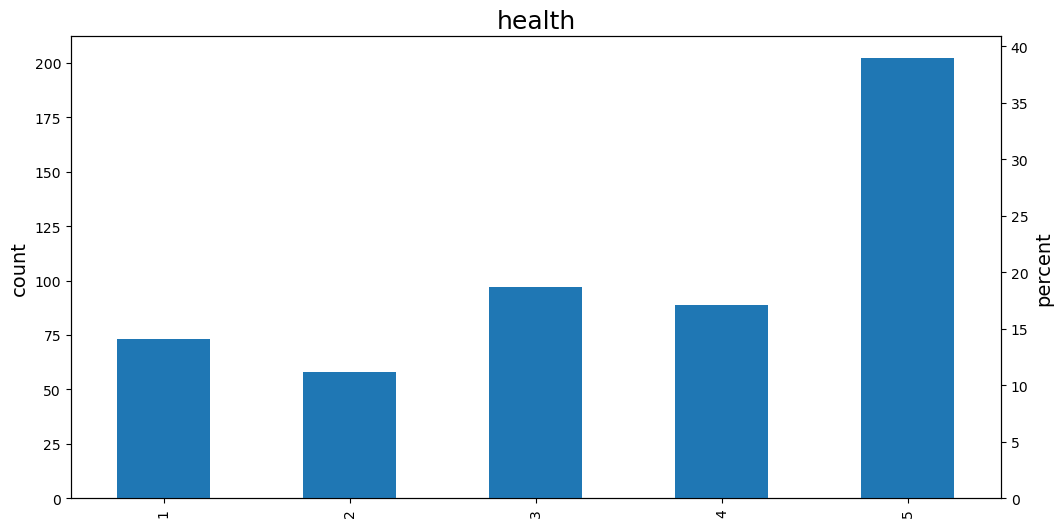

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["health"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("health", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["health"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Around 65% of students described in the "train_df" DataFrame describe themselves as being in "average" or better health (i.e., those rows in the "train_df" DataFrame had a value of 3, 4, or 5 for the "health" feature). Speaking yet again in general terms, academic success _might_ come more easily to students who are not dealing with significant health issues.

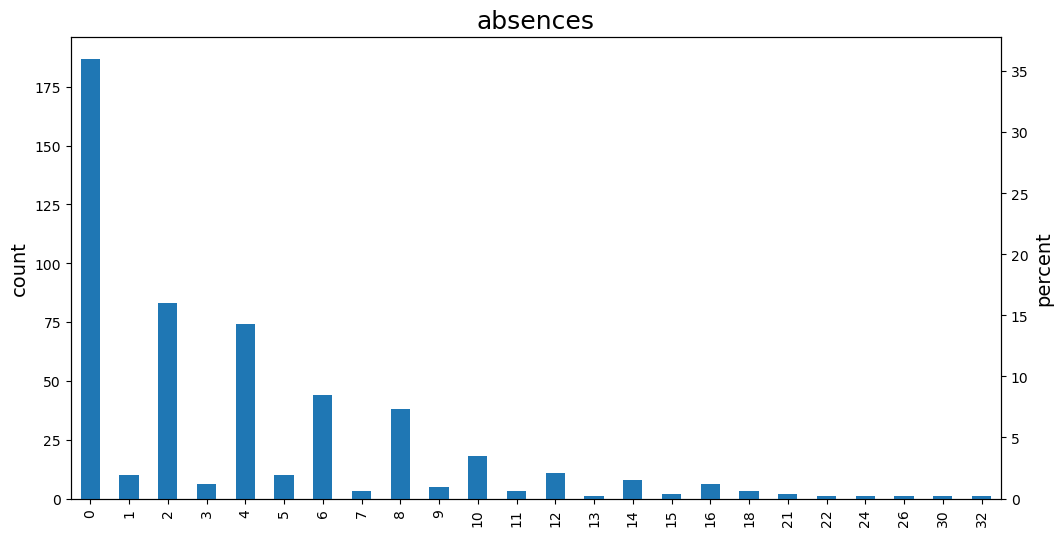

In [26]:
fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))
train_df["absences"\
        ].value_counts().sort_index().plot(ax=ax1, kind="bar")
ax1.set_title("absences", fontsize=18)

ax2 = ax1.twinx()
prct_class = (train_df["absences"].value_counts().sort_index()/
             nrows) * 100
prct_class.plot(kind="bar", ax=ax2)
ax1.set_ylabel("count", fontsize=14)
_ = ax2.set_ylabel("percent", fontsize=14)

Around 65% of students described in the "train_df" DataFrame have experienced four or less absences from the Portuguese class. It would be rather unsurprising if a student's probability of passing the Portuguese class were found to increase with the amount of in-class instruction they received.

While exploration of each feature's value distribution has provided "food for thought", all potential meaning gained from this exploration is ___at best conjectural___ in nature until the value distribution for each feature is put into _the larger context of course passage/failure_.

As such, we now move on to visualizing "pass/fail" distributions for various features within the "train_df" DataFrame.

_[As was the case before, any feature-specific visualization not considered to provide any insights or raise significant questions have been omitted from this Notebook out of concern for Notebook length. __This includes visualizations for features that were considered "of-interest" in earlier data exploration, but who, through visualization of each feature in the context of course passage/failure rates, are no longer considered "of-interest" or "of-concern".__]_

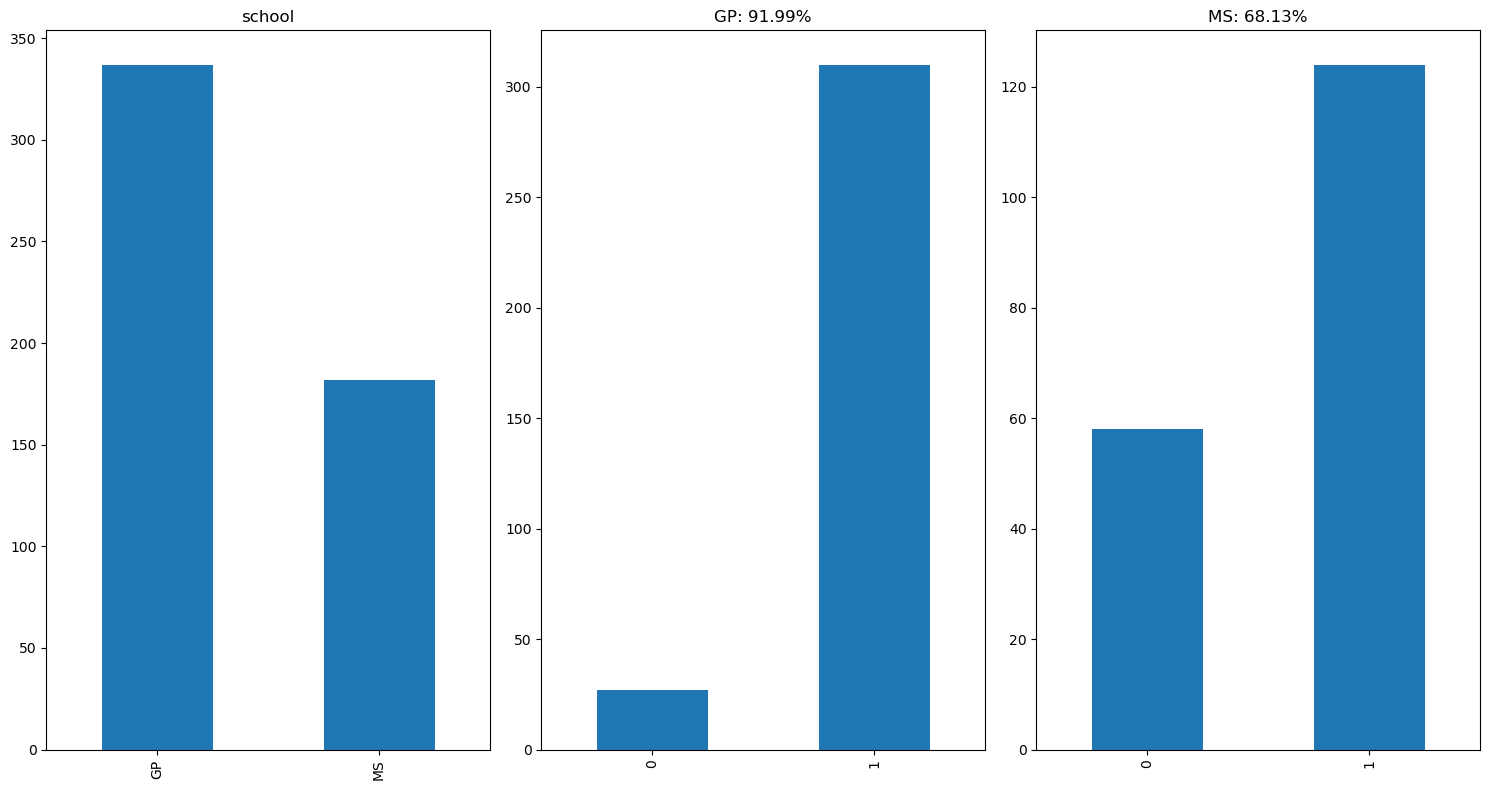

In [27]:
# Assigning the name of the feature whose "pass/fail" distribution
# we want to visualize to the variable name "col":
col = 'school'
# Obtaining the unique values contained in the feature bound to the
# variable name "col", sorting those values, and then assigning
# those values to the variable name "classes":
classes = sorted(train_df[col].unique())
# Generating AxesSubplots for each unique value in the feature bound
# to the variable name "col", as well as for the feature itself as a
# whole:
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
# Using `ax=axs[0]` to index the one-dimensional NumPy array in-
# stantiated above to obtain the first AxesSubplot for use in 
# plotting the overall "pass/fail" distribution for the feature
# bound to the variable name "col":
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

# Now, generating plots for each value in the object bound to the
# variable name "classes" (see code below):

# Using the `enumerate()` function to assign a numeric index value
# to each element - all the while storing each element and its index
# value as tuples within a generator - for each element in the
# object bound to the variable name "classes" (our for-loop below
# loops through each two-element tuple returned from our call of
# `enumerate(classes)`):
for counter, cl in enumerate(classes):
    # Generating a "pass/fail" distribution for each unique value
    # in the feature bound to the variable name "col":
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    # Calculating the percentage of students, for each unique value
    # in the feature bound to the variable name "col", who passed
    # the course (since failures are represented within the "pass"
    # feature by a value of 0 and passes are represented by a value
    # of 1, calculating this percentage is simply a matter of sum-
    # ming up the count of each unique value in the feature, divid-
    # ing this sum by the total value count for that unique value,
    # and multiplying the quotient by 100):
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

# Ensuring that AxesSubplots are properly spaced-apart from one
# another when outputted inline:
fig.tight_layout()

Out of the students described in the "train_df" DataFrame, those who attended the "Mousinho da Silveira" (i.e., "MS") school were nearly __four times__ as likely to fail the Portuguese course than those students who attended the "Gabriel Peralta" (i.e., "GP") school.

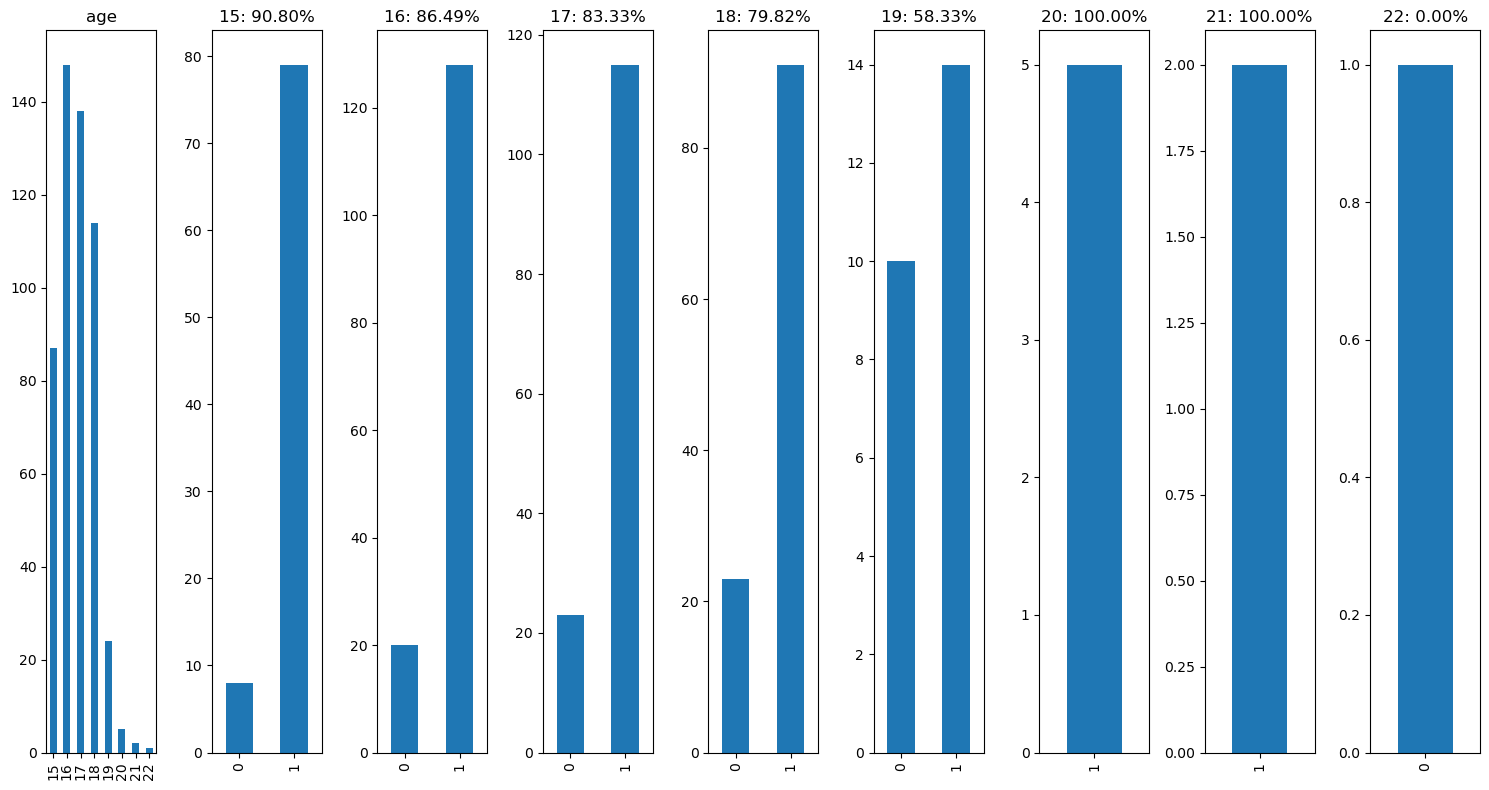

In [28]:
col = 'age'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Value counts for each unique value in the "age" feature are of course different, but generally speaking, it seems that there is a negative correlation between a given student's age and their probability of passing the Portuguese course (i.e., the older a given student gets, the more likely it _seems_ that the student will _not_ pass the course).

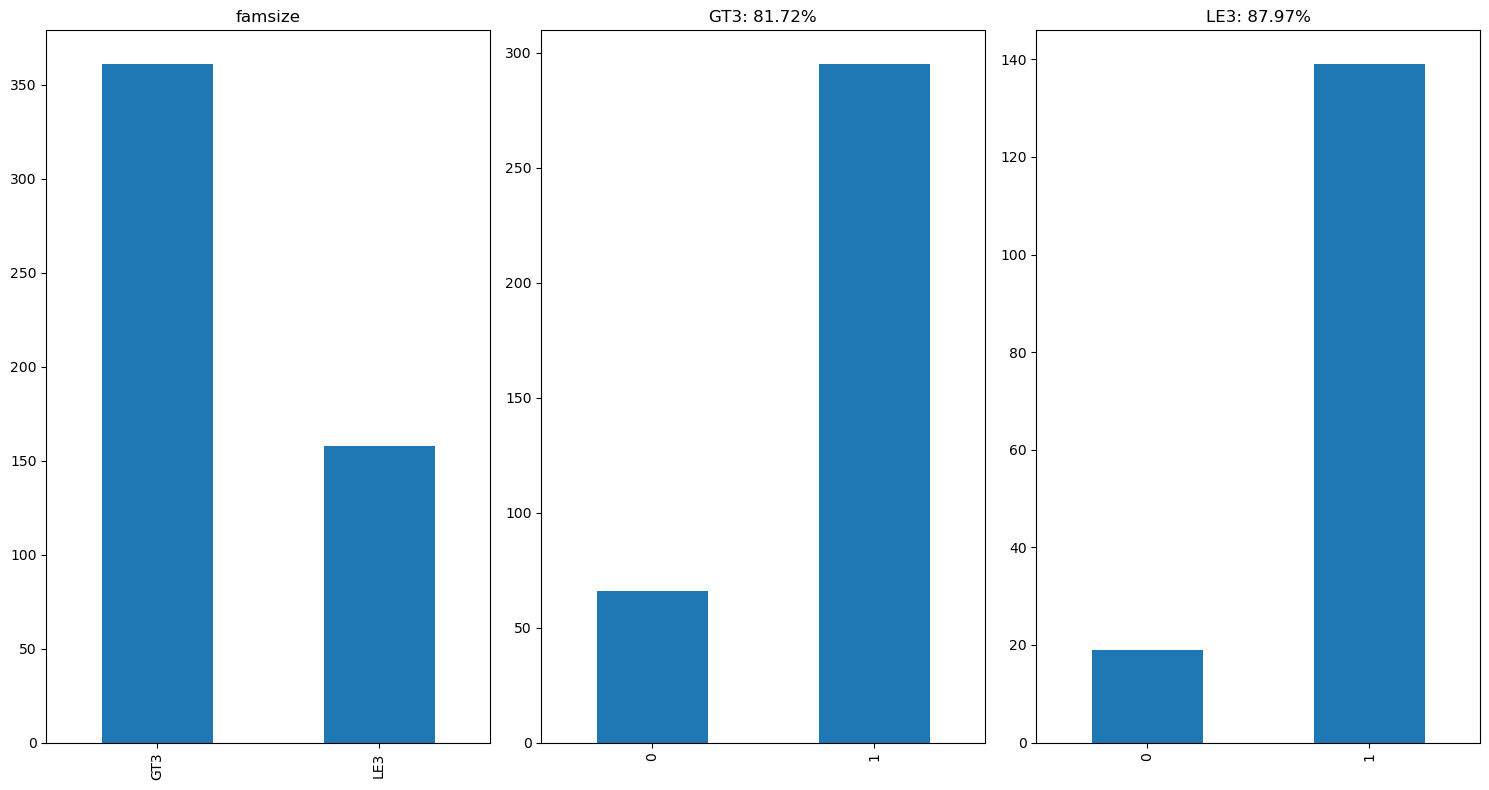

In [29]:
col = 'famsize'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

The size of a given student's family does not seem to have a significant effect on that student's probability of passing the Portugeuse course.

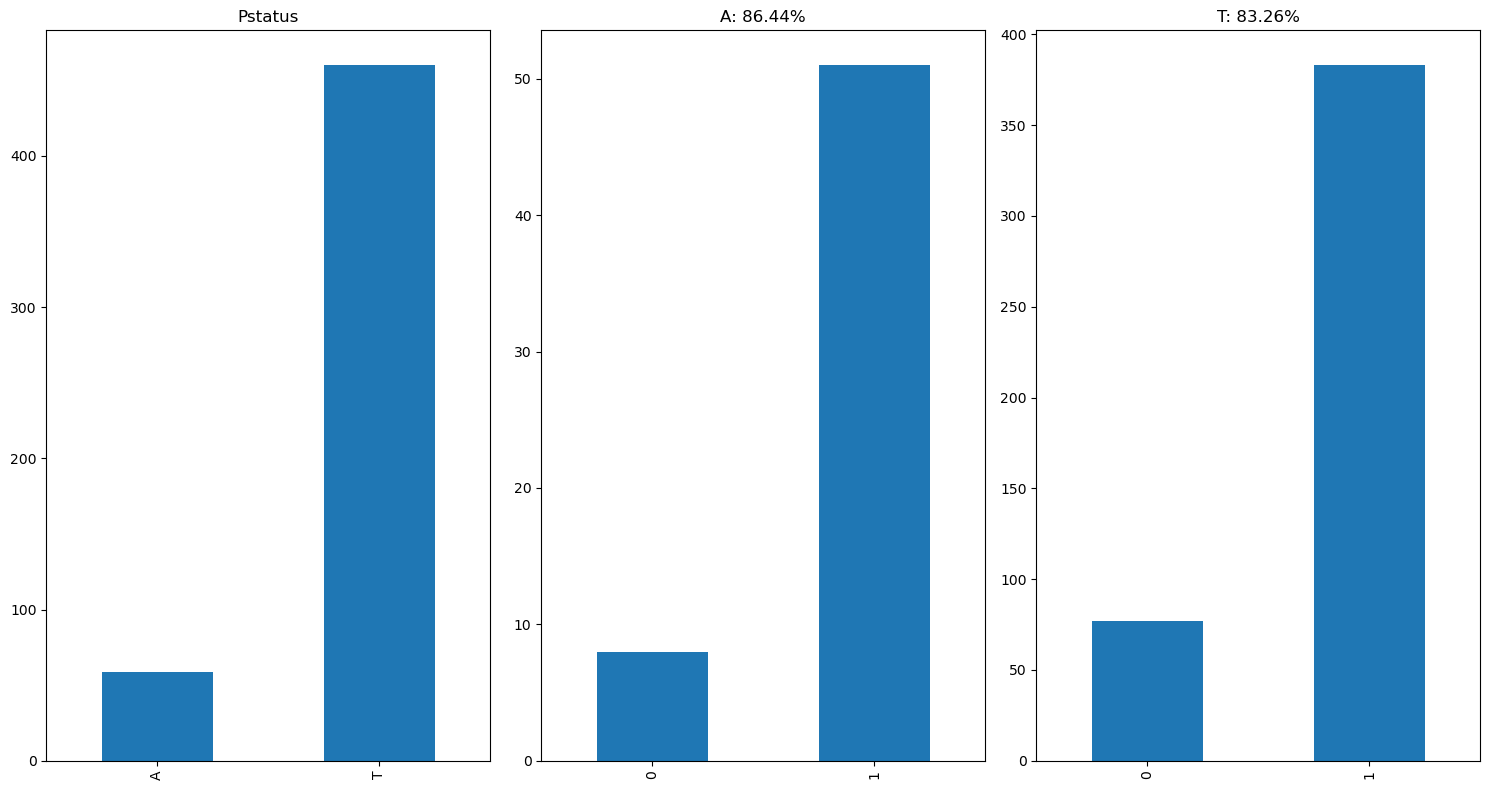

In [30]:
col = 'Pstatus'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Interestingly, it seems that students whose parents have separated are _slightly_ more likely to pass the course than students whose parents are still cohabitating.

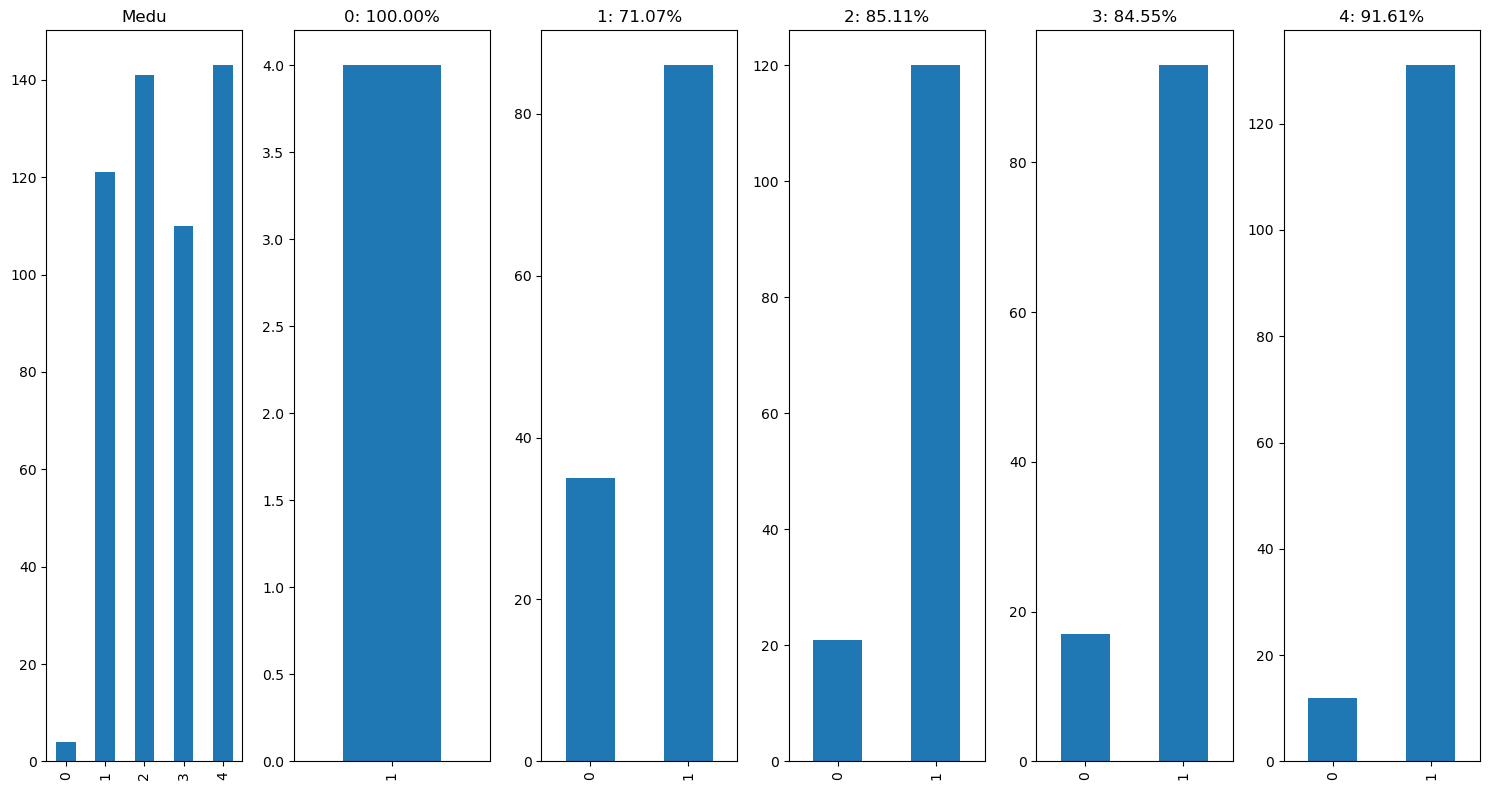

In [31]:
col = 'Medu'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Perhaps expectedly, a given student's probability of passing the Portuguese course _generally_ tends to increase with the extent of formal education that the student's mother has completed.

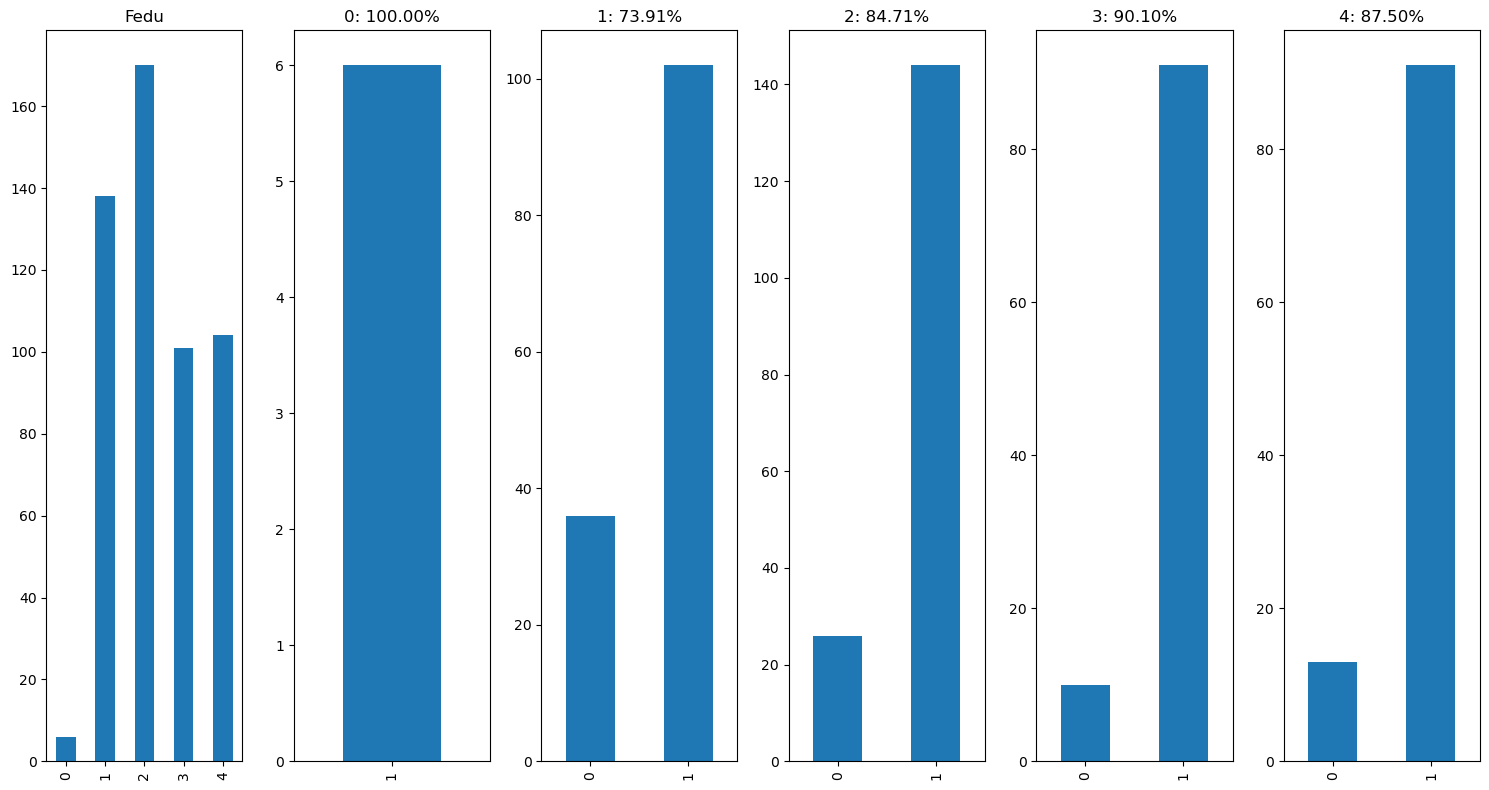

In [32]:
col = 'Fedu'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Unsurprisingly, a given student's probability of passing the Portuguese course _generally_ tends to increase with the extent of formal education that the student's father has completed.

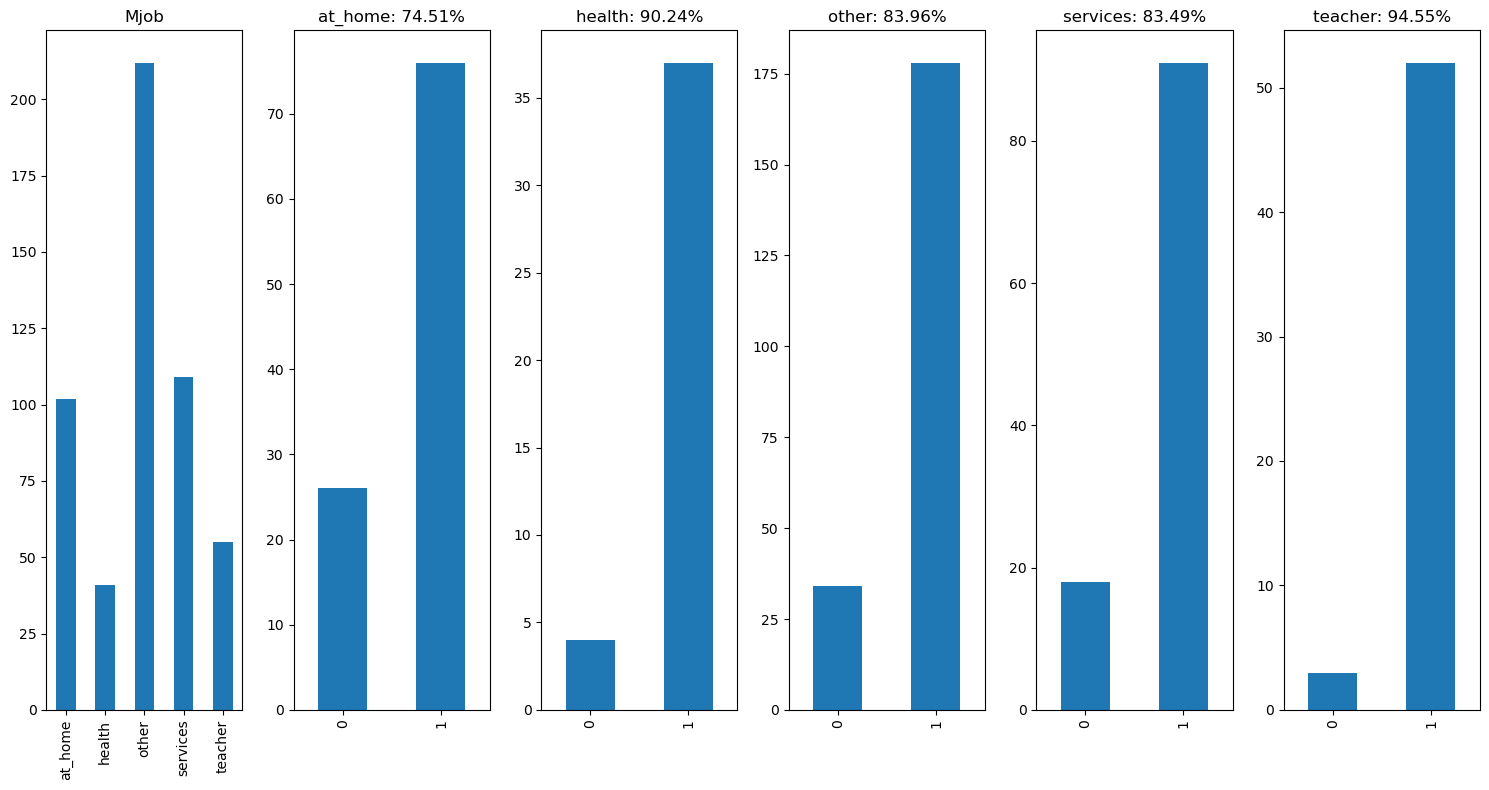

In [33]:
col = 'Mjob'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Perhaps in keeping with the _general_ tendency of a given student's probability of passing the course to _increase_ with the extent of formal education that the student's mother has completed, it _seems_ that the more _formal_ education the mother's job requires, the higher their child's probability of passing the course.

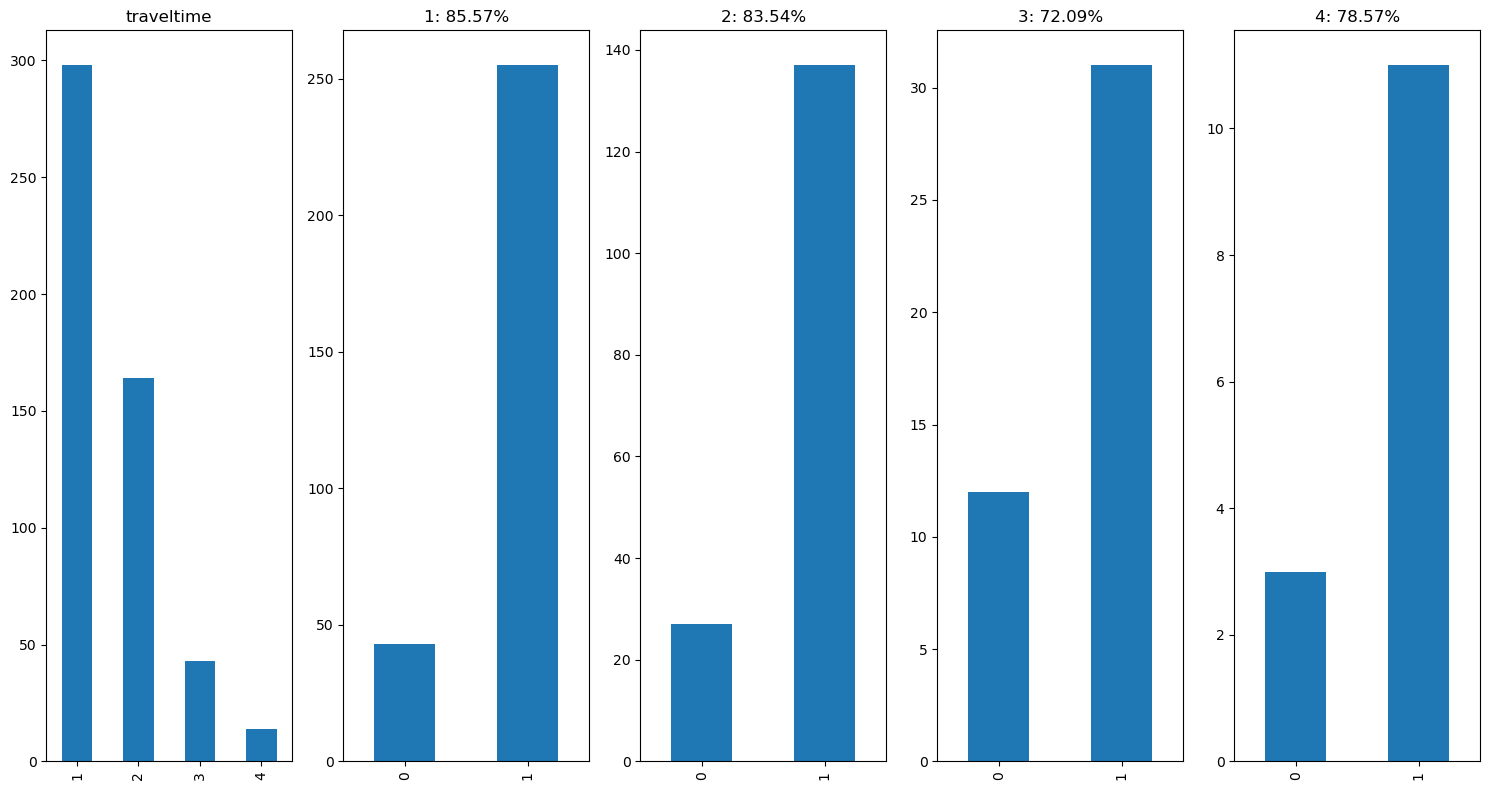

In [34]:
col = 'traveltime'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

For the students described in the "train_df" DataFrame, there seems to be a _general_ trend in which the closer a given student lives to their school, the higher that student's likelihood of passing the course.

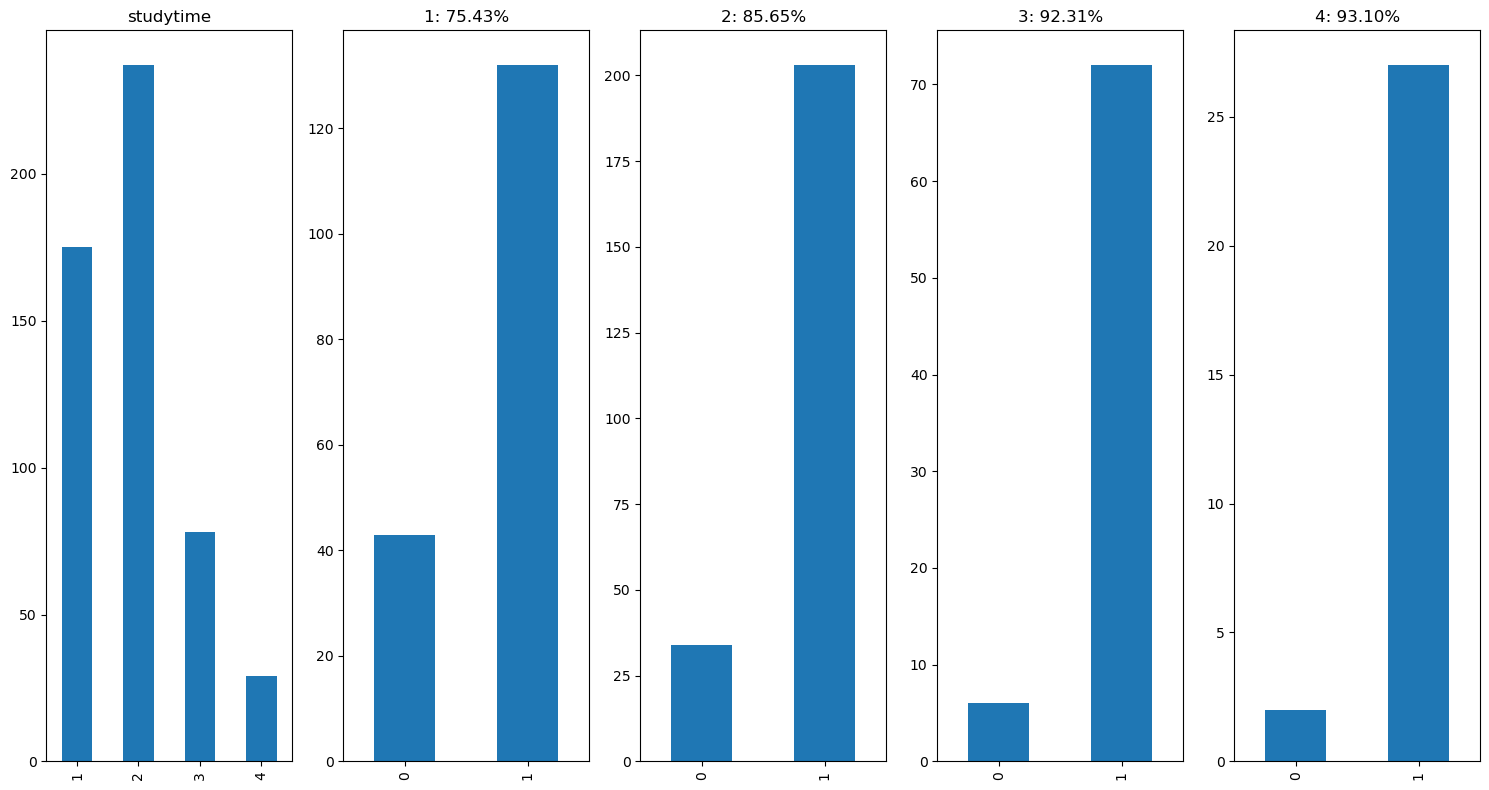

In [35]:
col = 'studytime'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Predictably, for the students described in the "train_df" DataFrame, the more time outside the classroom they devoted to the Portuguese course, the higher their likelihood of course passage.

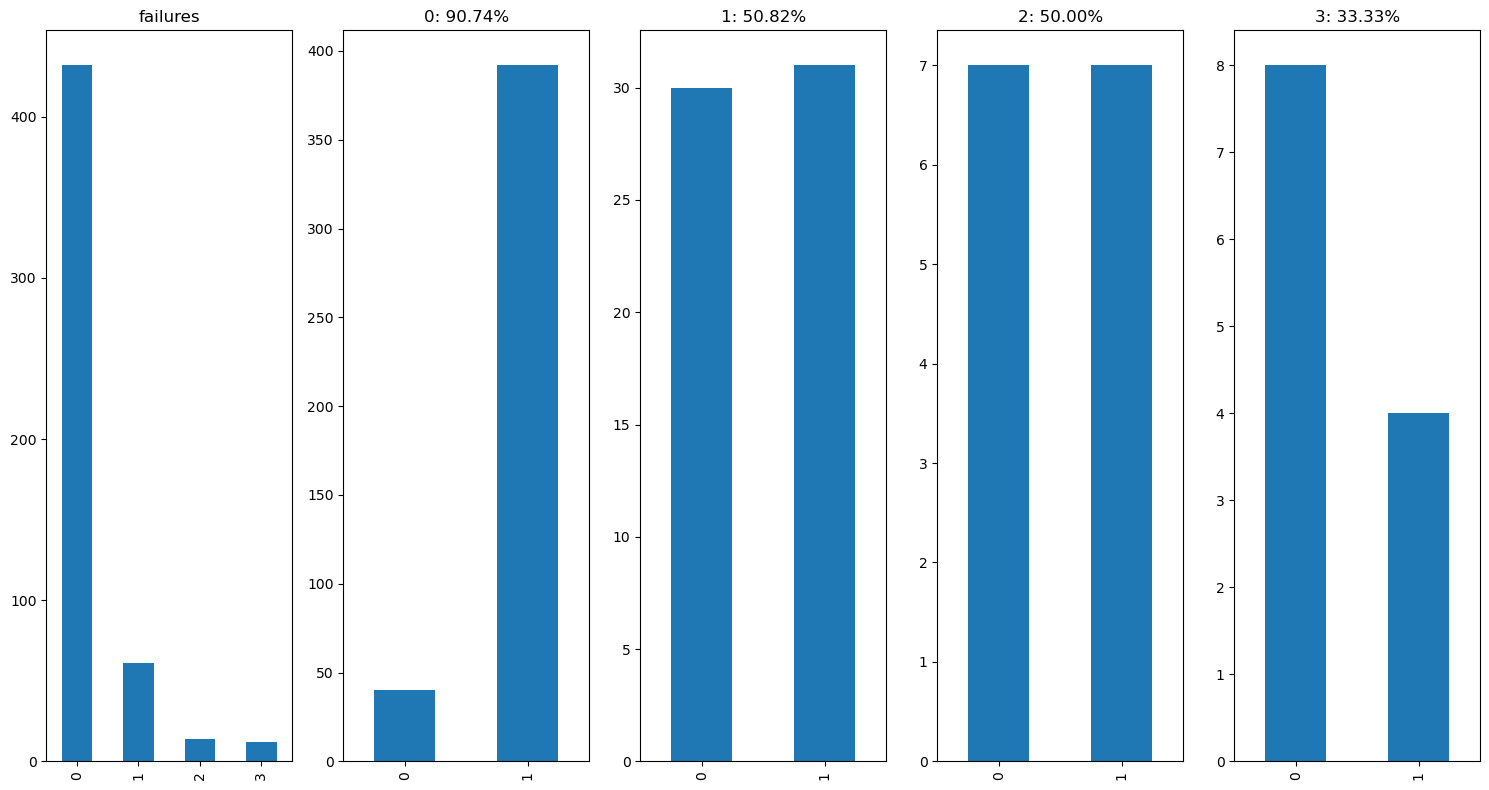

In [36]:
col = 'failures'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Just as we saw when exploring the "student-mat.csv" dataset in our weekly lectures, for the students described in the "train_df" DataFrame, ___the probability of passing the Portuguese course decreases with each successive previous failure of the same Portuguese course.___

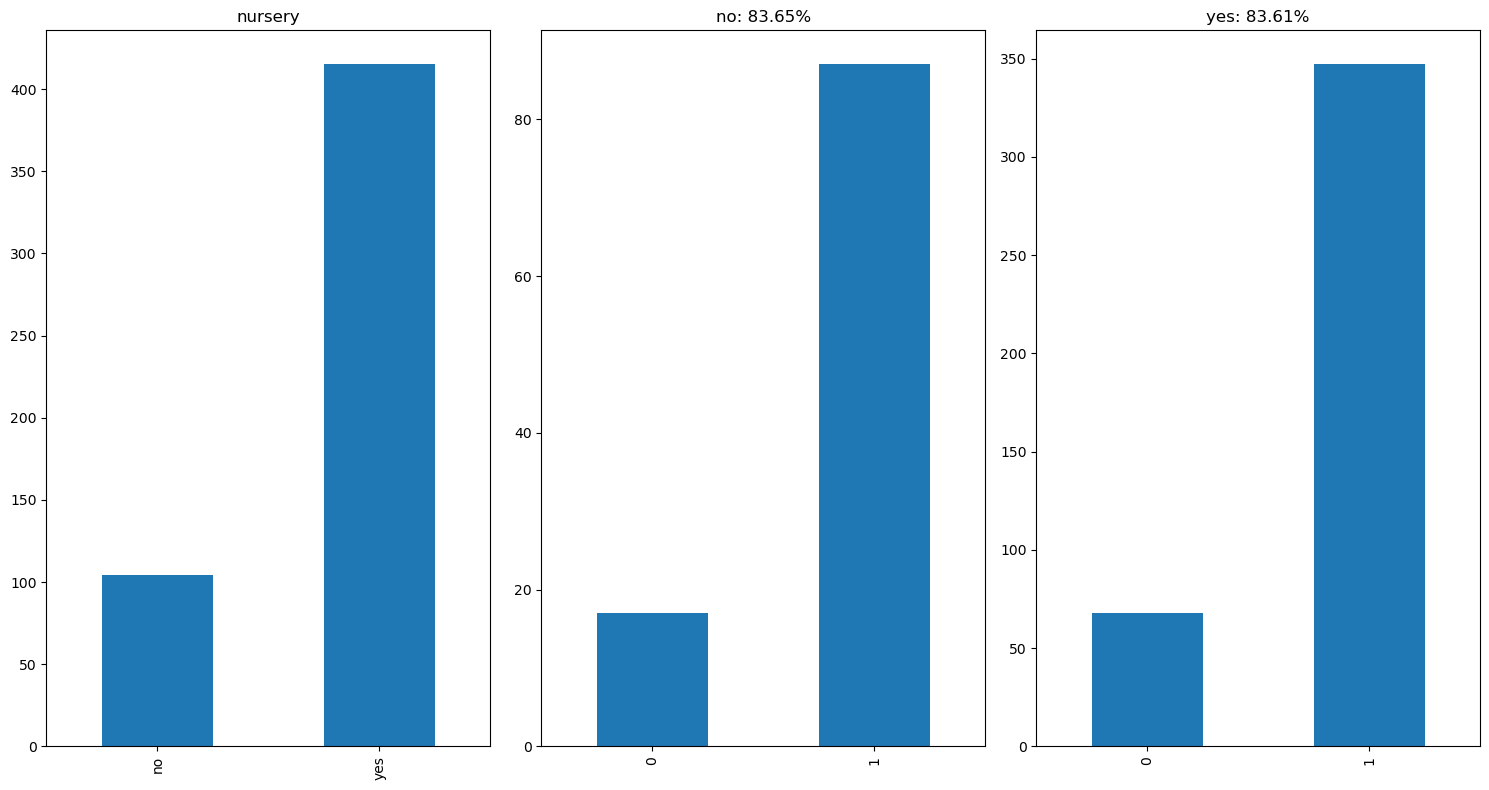

In [37]:
col = 'nursery'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

For the students described in the "train_df" DataFrame, those students who self-identified as having _not_ attended nursery school acutally enjoyed an ever-so-slightly higher course passage rate than their counterparts who _did_ attend nursery school.

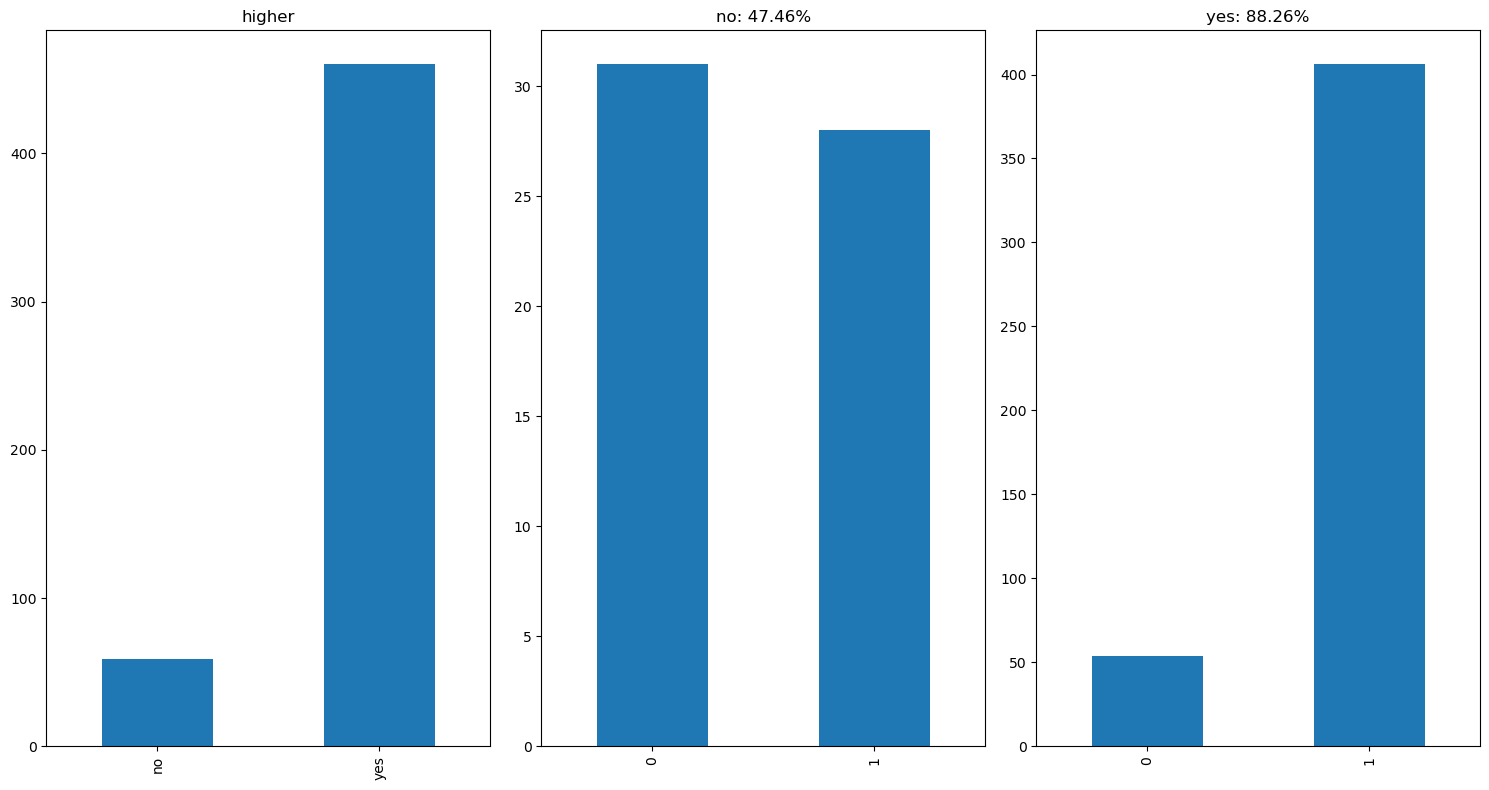

In [38]:
col = 'higher'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Unsurprisingly, those students described within the "train_df" DataFrame who self-reported as being interested in pursuing higher education enjoyed a significantly higher course passage rate than those students who self-identified as _not_ being interested in higher education

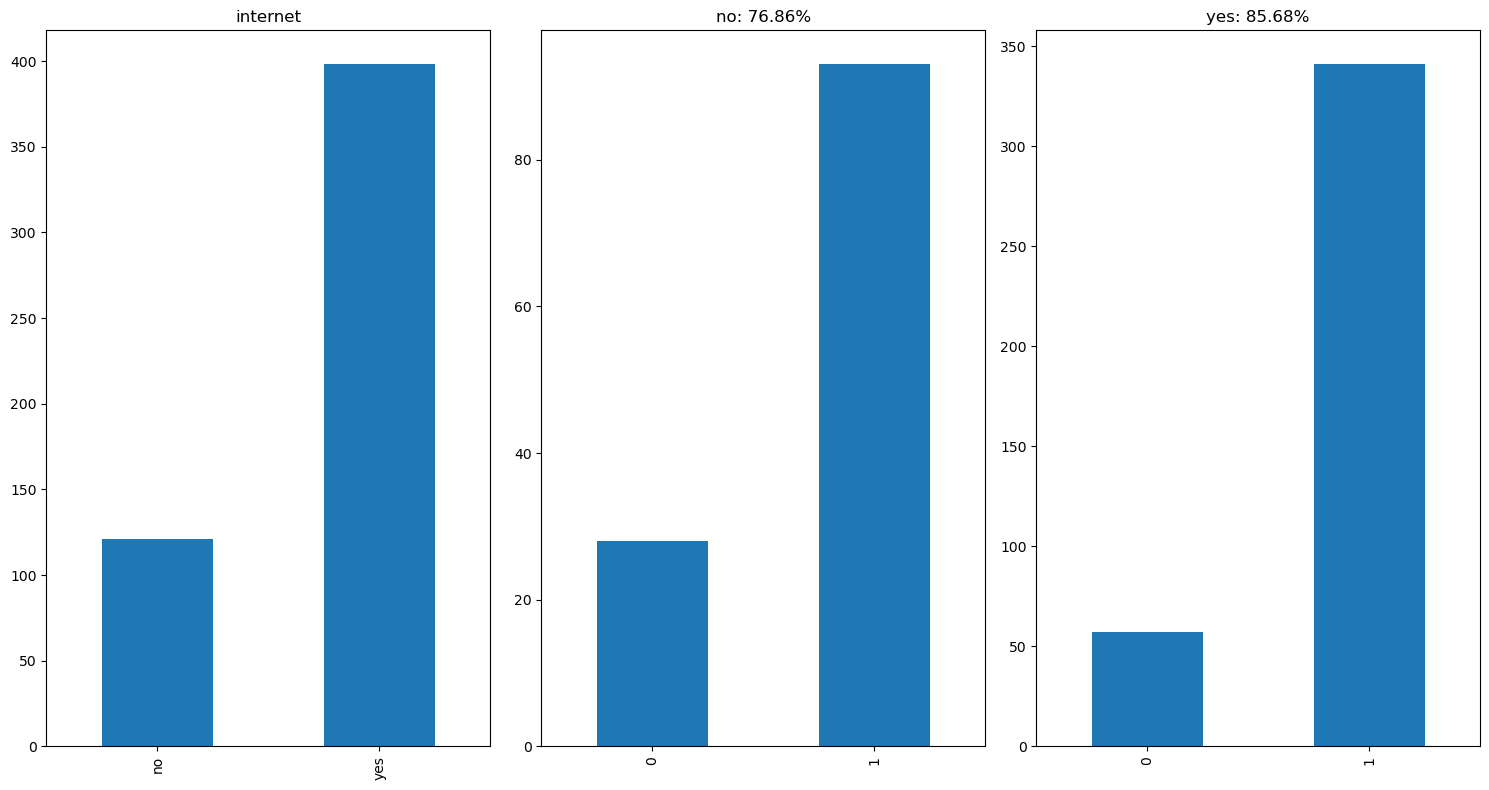

In [39]:
col = 'internet'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Somewhat surprisingly, it seems that whether or not a given student described in the "train_df" DataFrame had at-home access to the Internet did not amount to that much of a material difference in passage rates between the two groups.

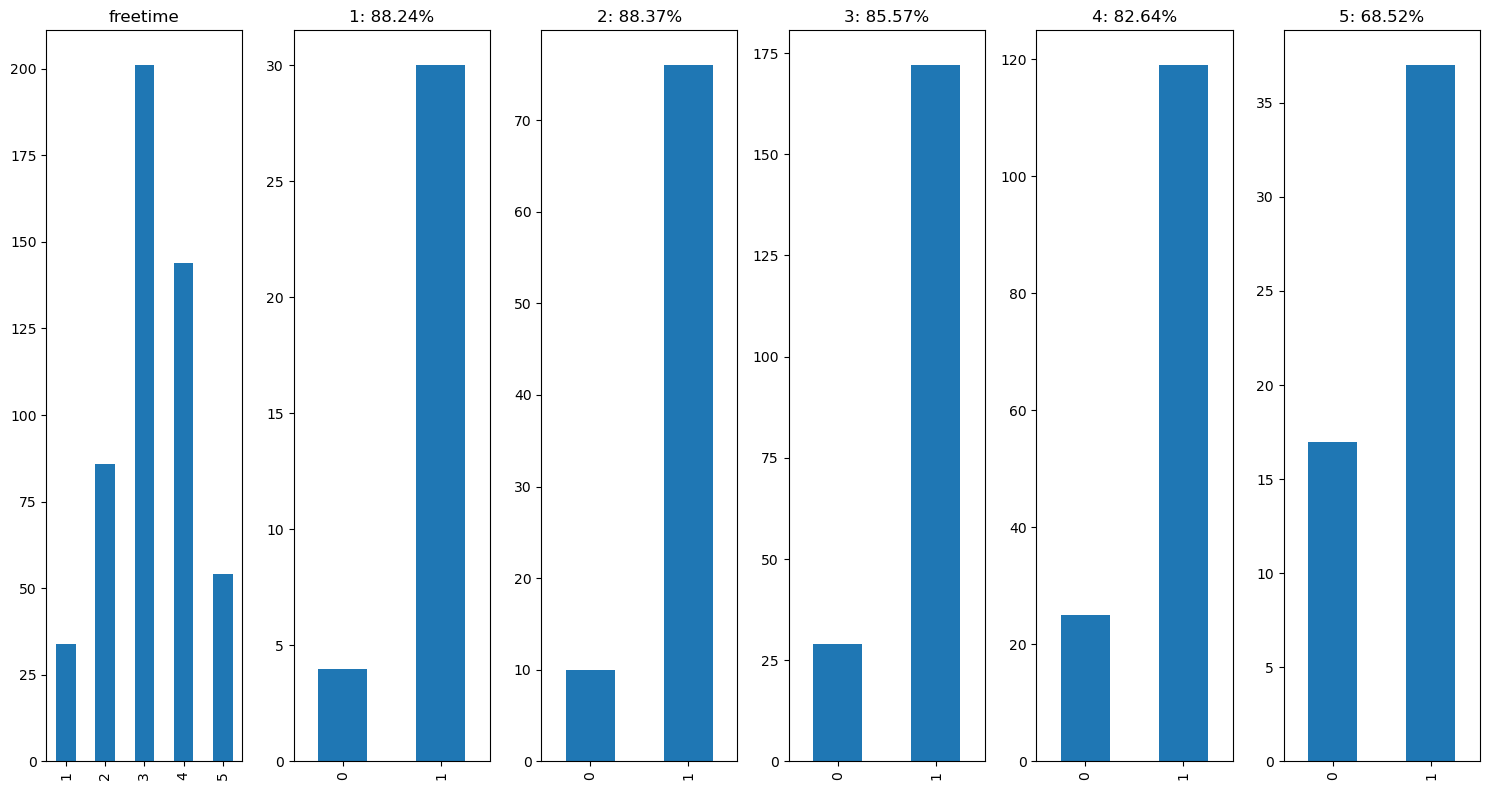

In [40]:
col = 'freetime'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Putting aside those students self-reporting as having "very low" free time (i.e., a value for the "freetime" feature of 1), it generally appears that the _less_ free time a given student had, the more likely they were to pass the Portuguese course.

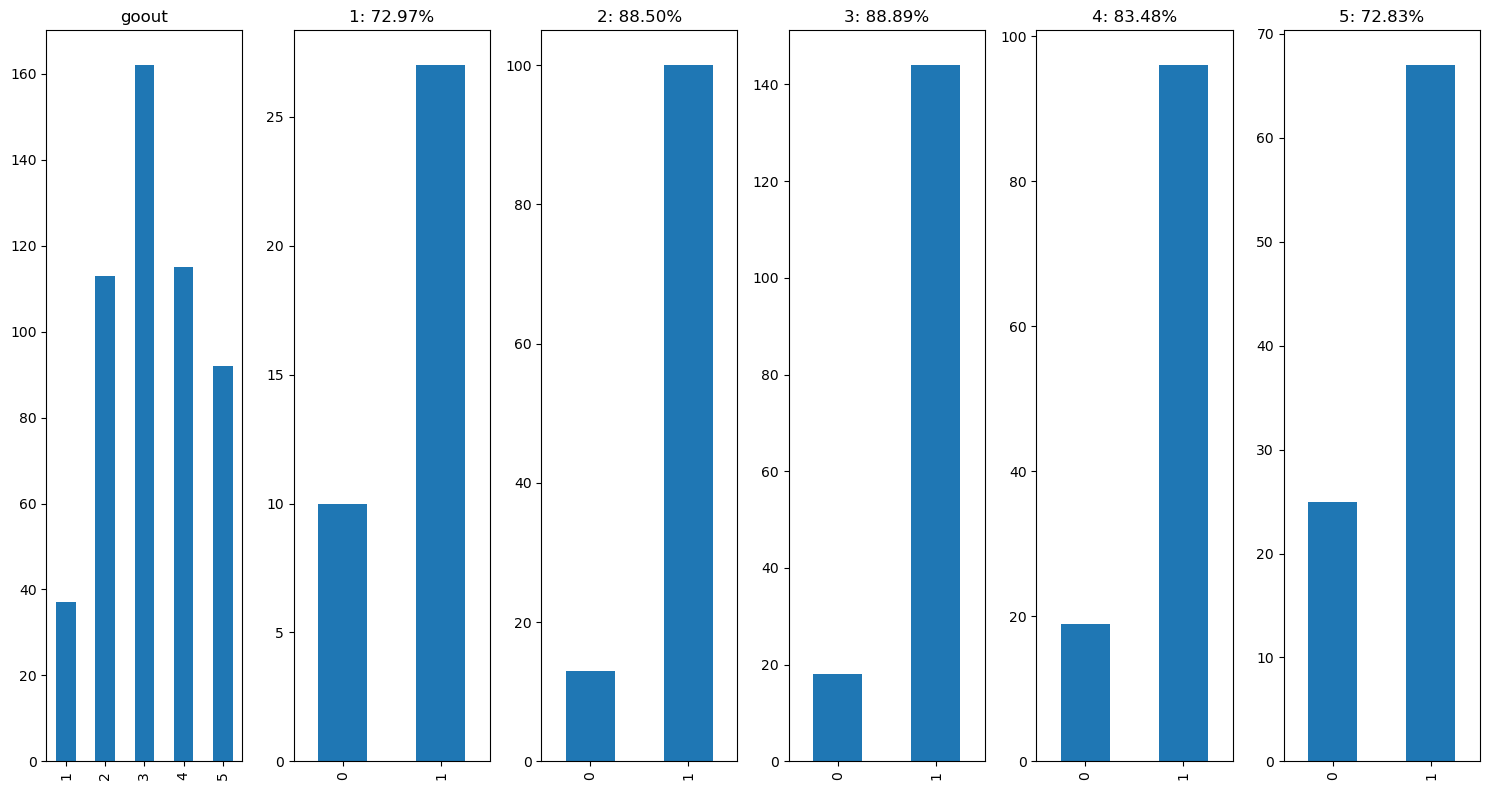

In [41]:
col = 'goout'
classes = sorted(train_df[col].unique())
fig, axs = plt.subplots(1, len(classes)+1, figsize=(15, 8))
train_df[col].value_counts().sort_index().plot(ax=axs[0], \
                                               kind='bar')
axs[0].set_title(col)

for counter, cl in enumerate(classes):
    pass_fail_counts = (train_df.loc[train_df[col] == cl, 'pass'].
                        value_counts().sort_index())
    pass_fail_counts.plot(ax=axs[counter+1], kind='bar')
    prct_pass = train_df.loc[train_df[col]\
                             == cl, 'pass'].mean() * 100
    axs[counter+1].set_title('{}: {:.2f}%'.format(cl, prct_pass))

fig.tight_layout()

Quite interestingly, those students who reported a "very low" level of going out with friends (i.e., a value for the "goout" feature of 1) enjoyed almost the same course passage rate as those students who reported a "very high" level of going out with friends (i.e., a value for the "goout" feature of 5). Those students described in the "train_df" DataFrame with a value of 2, 3, or 4 enjoyed similarly high course passage rates in comparison to the two previously-named value-groups.

Food for thought: perhaps the observations noted in the paragraph above speak to the value, in moderation, of student socializing to academic success?

Visualizing the "pass/fail" distribution for the "absences" feature requires some specialized code since "absences" is a continuous feature. We will need to determine the optimal quintiles for the "absences" feature's values and "bin" those values accordingly.

In [42]:
# Using `.percentile()` to bin the values in the continuous "absences"
# feature into quintiles:
np.percentile(train_df['absences'], [0, 20, 40, 60, 80, 100])

# The output of this cell should be interpreted as saying that 0% of
# the values (i.e., the "zeroeth percentile") in the "absences"
# feature are less than 0 (the value of the other 100% of entries in
# the "absences" feature are greater than or equal to 0); 20% of the
# values in the "absences" feature are less than or equal to 0 (the 
# value of the other 80% of entries in the "absences" feature are
# greater than or equal to 0); 40% of the values in the "absences" 
# feature have a value less than 2 (the value of the other 60% of
# entries in the "absences" feature are greater than 2); 60% of the 
# values in the "absences" feature have a value less than 4 (the
# value of the other 40% of entries in the "absences" feature are
# greater than 4); and so on and so forth. We use the below output
# to "guide" our binning:

array([ 0.,  0.,  2.,  4.,  7., 32.])

Now that we know our optimal binning arrangement for the "absences" feature, we can plot each quintile's values as an aid for visual analysis.

0 0
0 2
2 4
4 6
6 32


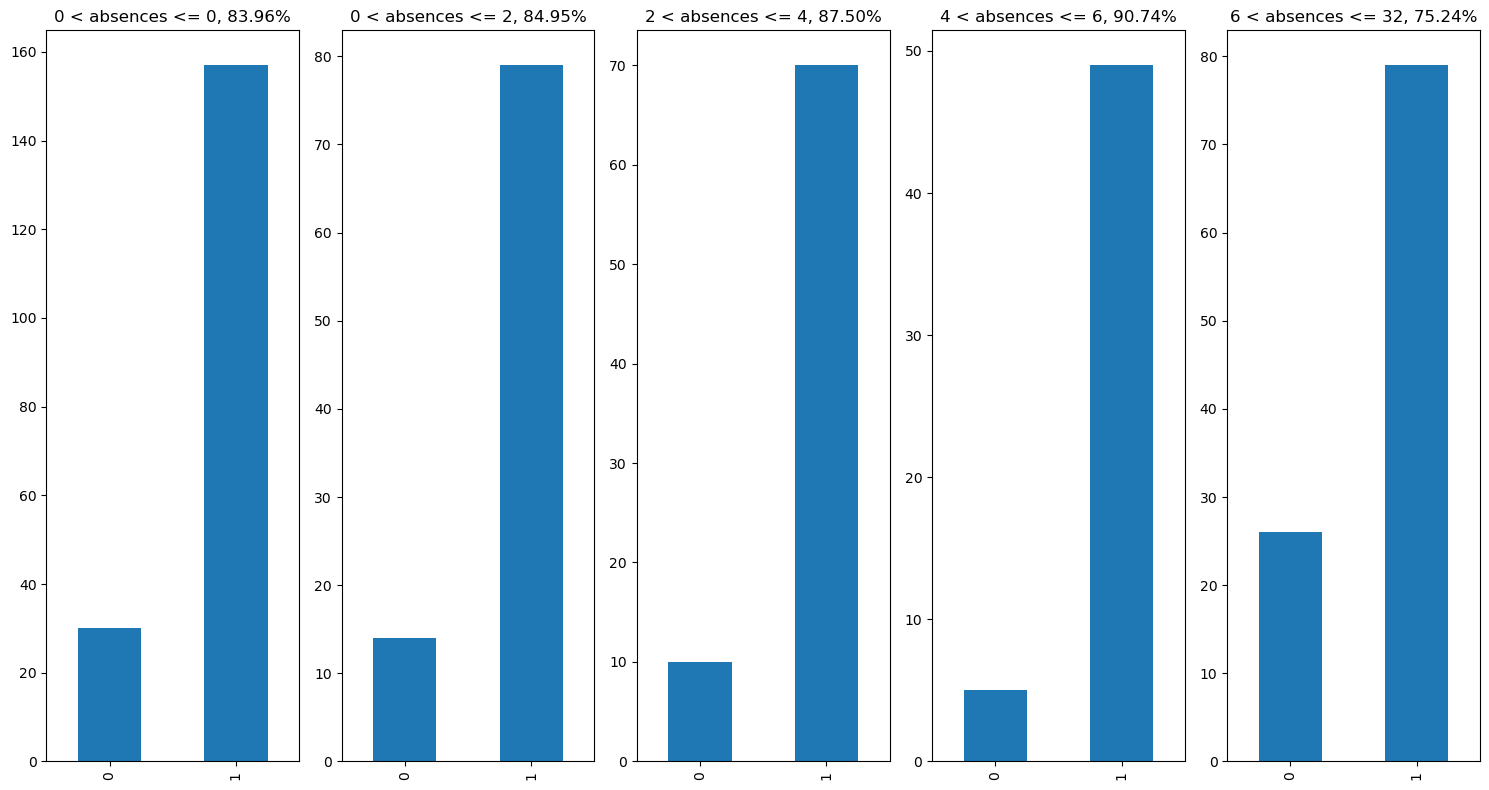

In [43]:
# Creating five AxesSubplots since we are organizing the values in
# the continuous "absences" feature into five bins:
fig, axs = plt.subplots(1, 5, figsize=(15, 8))

counter = 0
# Each tuple in the for-loop statement represents a quintile bin's
# bounds (see the output of the code cell above); `lb` and `ub`
# respectively are shorthand for "lower boundary" and "upper
# boundary" for each of the quintiles:
for lb, ub in [(0, 0), (0, 2), (2, 4), (4, 6), (6, 32)]:
    print(lb, ub)
    if (lb == 0) and (ub == 0):
        (train_df.loc[(train_df['absences'] == lb), \
                      'pass'].value_counts().
         sort_index().plot(ax=axs[counter], kind='bar'))
        # Calculating the percentage of students who passed the
        # course for this specific quintile bin:
        prct_pass = train_df.loc[(train_df['absences'] == lb), \
                                 'pass'].mean()*100
    
    else:
        # Obtaining all rows for the "pass" feature within the
        # "train_df" DataFrame that contain, at their intersection
        # with the "absences" feature, values greater than the
        # value of `lb` that our for-loop has currently iterated-
        # to and less than or equal to the value for `ub` that our
        # for-loop has similarly currently iterated-to, and then
        # obtaining counts for each unique value in the "pass"
        # feature; then, sorting those value counts and sub-
        # sequently plotting them:
        (train_df.loc[(train_df['absences'] > lb\
                      ) & (train_df['absences'] <= ub), \
                      'pass'].value_counts().
         sort_index().plot(ax=axs[counter], kind='bar'))
        # Calculating the percentage of students who passed the
        # course for this specific quintile bin:
        prct_pass = train_df.loc[(train_df['absences'] > lb) \
                                 & (train_df['absences'] <= ub), \
                                 'pass'].mean()*100
    
    # For each quintile-specific AxesSubplot, setting the title
    # using a formatted string:
    axs[counter].set_title('{} < absences <= {}, {:.2f}%'.format(
        lb, ub, prct_pass))
    
    counter += 1
    
fig.tight_layout()

Looking at the above plots, it would seem that the more absences past four a given student has from the Portuguese course, the lower their probability of course passage. Such an observation might generally be considered common sensical.

## Step 4: Build the Models Below

The data within the "train_df" DataFrame now thoroughly explored, we are ready to move into predictive modeling itself. This being said, we have some transformations (e.g., removal of records with 0-values for the "G3" feature, dummy-encoding, etc.) to apply to the "train_df" and "test_df" DataFrames before we can properly create and train a logistic regression model.

_Note that we will complete all data preparation and model training specific to our logistic regression model __before__ moving on to data preparation and model training for our decision tree model._

To start, we will remove from both the "train_df" DataFrame and the "test_df" DataFrame any records with 0-values for the "G3" feature (their potential for unnecessarily hindering our forecasting is likely higher than any sort of value they actually add to the dataset).

In [44]:
# Obtaining every row from the "train_df" DataFrame for which the
# value at the intersection of that row and the "G3" feature is
# greater than 0, and then binding the resulting DataFrame to the
# variable name "train_df_no0s":
train_df_no0s = train_df.loc[train_df['G3'] > 0, :]
# Doing the same for the "test_df" DataFrame:
test_df_no0s = test_df.loc[test_df['G3'] > 0, :]

### Data Preparation and Model Training - _Logistic Regression_

Next, we apply dummy-encoding to both the "train_df_no0s" DataFrame and the "test_df_no0s" DataFrame so that our original categorical features (e.g., "Medu", "Fjob", etc.) are translated into a numerical format digestible by our logistic regression training algorithm:

In [45]:
# Using the `.get_dummies()` method to automatically create, from
# the "train_df_no0s" DataFrame's original categorical features,
# the dummy binary features necessary for logistic regression
# modeling:
train_df_no0s_dummies = pd.get_dummies(train_df_no0s, \
                                       drop_first=True)

In [46]:
# Using the `.get_dummies()` method to automatically create, from
# the "test_df_no0s" DataFrame's original categorical features,
# the dummy binary features necessary for logistic regression
# modeling:
test_df_no0s_dummies = pd.get_dummies(test_df_no0s, \
                                       drop_first=True)

In [47]:
train_df_no0s_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
34,16,3,2,1,1,0,5,4,3,1,...,1,0,0,1,0,0,0,1,1,0
432,17,1,1,1,1,1,5,4,4,2,...,0,0,0,1,0,0,0,0,1,0
399,18,3,2,1,3,0,5,4,3,2,...,1,0,0,0,0,0,1,1,1,1
346,17,4,4,2,1,0,4,1,1,2,...,0,0,0,0,0,0,1,1,1,0
542,16,4,4,2,3,0,5,3,5,1,...,1,0,0,1,0,0,1,1,1,1


In [48]:
test_df_no0s_dummies.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
532,16,2,1,2,2,0,4,2,2,1,...,1,0,0,0,0,0,0,1,1,1
375,17,0,2,2,3,0,3,3,3,2,...,0,0,0,0,0,0,1,1,1,0
306,18,3,4,2,2,0,4,2,5,3,...,1,0,0,1,0,1,1,1,1,0
625,18,2,3,2,1,0,5,2,3,1,...,0,0,0,1,0,0,1,1,1,1
480,19,2,3,1,1,1,4,4,4,1,...,0,1,0,0,0,0,1,0,1,1


The above output of our calls to the `.head()` method suggest that "train_df_no0s" and "test_df_no0s" have been successfully translated into the dummy-encoded DataFrames "train_df_no0s_dummies" and "test_df_no0s_dummies".

Now that both DataFrames have been successfully dummy-encoded, we must separate both DataFrames into a "predictor" and "predictand"/"target" DataFrame. This involves separating the "predictor" feature**s** from the "target" column (i.e., "pass"). The predictor DataFrame for model training will be bound to the variable name "X_train" while the "target" DataFrame for model training will be bound to the variable name "y_train" (similarly, the predictor DataFrame for model testing will be bound to the variable name "X_test" while the "target" DataFrame for model testing will be bound to the variable name "y_test").

In [49]:
# Separating the features in the "train_df_no0s_dummies" DataFrame
# into "predictors" and "predictand" (and saving the predictors in
# a list bound to the variable name "xCols"); we do not want the
# "G3" column included in our "predictors" DataFrames because the
# "G3" column contains the student's actual final grade (which, of
# course, has a very high correlation to whether or not a student
# passed the course); we exclude "pass" from our "predictors" Data-
# Frame because the "pass" feature is our target feature:
xCols = [col for col in train_df_no0s_dummies.columns \
         if col not in ['pass', 'G3']]

# Instantiating, from the "train_df_no0s_dummies" DataFrame, our
# "predictors" DataFrame bound to the variable name "X_train":
X_train = train_df_no0s_dummies[xCols]
# Instantiating, from the "train_df_no0s_dummies" DataFrame, our
# "predictand" Series bound to the variable name "y_train"; our
# "target" column/feature (a.k.a. "predictand") is the "pass" column:
y_train = train_df_no0s_dummies['pass']

# Separating, just as we did for the training data above, the "test-
# _df_no0s_dummies" DataFrame into "predictor" and "predictand" Data-
# Frames (and, in doing so, creating two new DataFrames: "X_test" and
# "y_test"):
X_test = test_df_no0s_dummies[xCols]
y_test = test_df_no0s_dummies['pass']

We now move on to mean-standardization of the values in each of our two predictor-featured DataFrames. We mean-standardize both of these DataFrames' values to ensure that the DataFrames' binary, dummy-encoded features (e.g., "guardian_mother", "schoolsup_yes", "nursery_yes", etc.) are not unduly eliminated by our regularization constant from contention for having a measurable impact on our logistic regression model's predictions.

In [50]:
# For the "X_train" DataFrame, subtracting the average of each
# feature's values from the respective feature's values, and then
# dividing the resulting differences for each feature by each
# respective feature's standard deviation:
X_train_standardized = ((X_train - X_train.mean()) / X_train.std())
# Applying the same transformation that we applied to the "X_train"
# DataFrame to the "X_test" DataFrame so that the data in the "X_-
# test" DataFrame are mean-standardized using the same data that we
# used to mean-standardize the values in the "X_train" DataFrame:
X_test_standardized = ((X_test - X_train.mean()) / X_train.std())

To prevent our logistic regression model from over-optimizing (i.e., "over-learning") on its training dataset, we will use cross-validation to determine the optimum value for our model's regularization coefficient `C`.

In [51]:
# Setting the regularization coefficients that we would like to
# test:
reg_params = [1e15, 10000, 1000, 100, 10, 1, 0.1, 0.01]

# Instantiating a LogisticRegressionCV object; passing our list of
# regularization coefficients to the `Cs` keyword argument, setting
# the `penalty` keyword argument to `l1` (i.e., "LASSO" regular-
# ization"), the number of cross-validation "folds" to 5, and the
# `solver` keyword  argument to "liblinear" (the `solver` keyword
# argument allows us to specify the algorithm we want to use to
# optimize our model; the default "solver" does not work with the
# `l1` penalty):
logRegCVSD = LogisticRegressionCV(Cs = reg_params, penalty = 'l1', \
                               cv = 5, solver = 'liblinear')

# Training our model logistic regression model:
logRegCVSD.fit(X_train_standardized, y_train)

LogisticRegressionCV(Cs=[1000000000000000.0, 10000, 1000, 100, 10, 1, 0.1,
                         0.01],
                     cv=5, penalty='l1', solver='liblinear')

### Data Preparation and Model Training - _Decision Tree_

We will once again use dummy encoding to convert the nominal categorical features present within "student-por.csv". In the case of dummy encoding for decision tree training, however, we do not need to drop a class/dummy variable for each dummy-encoded feature using `.get_dummies()` method's `drop_first` keyword argument like we did for logistic regression.

In [52]:
train_df_no0s_dummies_dTree = pd.get_dummies(train_df_no0s)
test_df_no0s_dummies_dTree = pd.get_dummies(test_df_no0s)

Now that both DataFrames have been successfully dummy-encoded, we must separate both DataFrames into a "predictor" and "predictand"/"target" DataFrame. This involves separating the "predictor" feature**s** from the "target" column (i.e., "pass"). The predictor DataFrame for model training will be bound to the variable name "X_train_dTree" while the "target" DataFrame for model training will be bound to the variable name "y_train_dTree" (similarly, the predictor DataFrame for model testing will be bound to the variable name "X_test_dTree" while the "target" DataFrame for model testing will be bound to the variable name "y_test_dTree").

In [53]:
# Separating the features in the "train_df_no0s_dummies_dTree" Data-
# Frame into "predictors" and "predictand" (and saving the predict-
# ors in a list bound to the variable name "xCols_dTree"); we do not
# want the "G3" column included in our "predictors" DataFrames be-
# cause the "G3" column contains each student's actual final grade;
# we exclude "pass" from our "predictors" DataFrame because the
# "pass" feature is our target feature:
xCols_dTree = [col for col in train_df_no0s_dummies_dTree.columns \
         if col not in ['pass', 'G3']]

# Instantiating, from the "train_df_no0s_dummies_dTree" DataFrame,
# our "predictors" DataFrame bound to the variable name "X_train_-
# dTree":
X_train_dTree = train_df_no0s_dummies_dTree[xCols_dTree]
# Instantiating, from the "train_df_no0s_dummies_dTree" DataFrame,
# our "predictand" Series bound to the variable name "y_train_-
# dTree"; our "target" column/feature (a.k.a. "predictand") is the
# "pass" column:
y_train_dTree = train_df_no0s_dummies_dTree['pass']

# Separating, just as we did for the training data above, the "test-
# _df_no0s_dummies_dTree" DataFrame into "predictor" and "predict-
# and" DataFrames (and, in doing so, creating two new DataFrames:
# "X_test_dTree" and "y_test_dTree"):
X_test_dTree = test_df_no0s_dummies_dTree[xCols_dTree]
y_test_dTree = test_df_no0s_dummies_dTree['pass']

Now that our predictor and predictand DataFrames have been accordingly structured, we would like to determine the optimal value for the `min_samples_leaf` hyperparameter and use it to train our decision tree training algorithm. To do so, we make use of the `GridSearchCV()` class, which allows us to iteratively test different values for one or more specific hyperparameters over a cross-validation loop.

In [54]:
# Creating our `DecisionTreeClassifier` object; passing the
# `random_state` keyword argument a value of 0:
clf = DecisionTreeClassifier(random_state=0)

# Instantiating a dictionary bound to the variable name "parameters"
# containing the hyperparamter we want to test as well as the value
# range over which we would like to test the hyperparameter:
parameters = {'min_samples_leaf': range(5, 101)}

# Instantiating our `GridSearchCV()` object and binding it to the
# variable name "gsCV"; passing as arguments to our "gsCV" `Grid-
# SearchCV()` object our "clf" decision tree model, the "parameters"
# dictionary, and the number of cross-validation folds (assigned to
# the `cv` keyword argument); since we want the model's predictive
# accuracy when applied to our training datset to be recorded, we
# set `return_train_score` to `True`:
gsCV = GridSearchCV(clf, parameters, cv=5, return_train_score=True)

# Training our decision tree model on the training dataset contained
# within the "X_train_dTree" DataFrame; our model will perform the
# cross-validation loop for every hyper-paramter combination we wish
# to test:
gsCV.fit(X=X_train_dTree, y=y_train_dTree)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'min_samples_leaf': range(5, 101)},
             return_train_score=True)

We bind the decision tree that has been trained using the optimum hyperparameters to the variable name "bT" (shorthand for "best tree"):

In [55]:
bT = gsCV.best_estimator_

## Step 5: Evaluate the Model Performance

Now that we have trained both our logistic regression and decision tree models, we can proceed to evaluating their overall performance. We will first evaluate our logistic regression model's performance and then progress to evaluating our decision tree model's performance.

The _baseline accuracy_ (i.e., the accuracy of a hypothetical "model" that ___always___ predicts that a given student will pass the Portuguese course) that _both_ our logistic regression model and our decision tree model will hopefully exceed is __83.62%__ (this number is derived from our visualization earlier in this Notebook of the pass/fail rate for each student described in the "train_df" DataFrame).

For our purposes, any predictive model meant for classification problems - whether logistic regression or decision tree - that exhibits a lower predictive accuracy when trained-on and applied to data from "student-por.csv" may be considered a _suboptimal_ model.

### Model Performance Evaluation - _Logistic Regression_

Let's calculate our logistic regression model's predictive accuracy on both our _training_ data and _testing_ data using the `accuracy_score()` function:

In [56]:
# Generating forecasts using the "X_train_standardized" DataFrame;
# then, calculating the accuracy of those forecasts by comparing the
# predicted values to the true "target" values:
pred_train = logRegCVSD.predict(X_train_standardized)
train_data_accuracy = accuracy_score(pred_train, y_train)

# Doing the same as above (except this time, using the "X_test_-
# standardized" DataFrame):
pred_test = logRegCVSD.predict(X_test_standardized)
test_data_accuracy = accuracy_score(pred_test, y_test)

# Printing our model's predictive accuracy for both datasets in an
# easily-readable format:
print("Accuracy on Training Dataset {:.2f}%".format(
    train_data_accuracy*100)) 
print("Accuracy on Testing Dataset {:.2f}%".format(
    test_data_accuracy*100))

Accuracy on Training Dataset 86.93%
Accuracy on Testing Dataset 86.05%


While our logistic regression model _does_ exceed the baseline predictive accuracy of 83.62%, there is evidence that the model is _overfitting_ on the training dataset in that the model's predictive accuracy on the training dataset is ever-so-slightly higher than its predictive accuracy when applied to the testing dataset. That being said, since our logistic regression model's predictive accuracy _does_ exceed the baseline predictive accuracy (even if by only roughly 2.5%), the case can be made that the model _does_ provide a miniscule predictive improvement over a hypothetical "model" that simply predicts that every student described in "student-por.csv" will pass the course.

Our next step is to create and examine a confusion matrix for our logistic regression model. Doing so should allow us to gain a better understanding of the predictions made by our model. Before we can visually plot our confusion matrix, however, we need to define the `plot_confusion_matrix()` function (which, as implied by the function name, allows us to visually plot our confusion matrix; documentation for the `plot_confusion_matrix()` can be found at the following URL: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py):

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), \
                                  range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Now that we have defined the `plot_confusion_matrix()` function, 
we compute and plot the confusion matrix for the "logRegCVSD" logistic regression model:

Confusion matrix, without normalization
[[  0  14]
 [  4 111]]


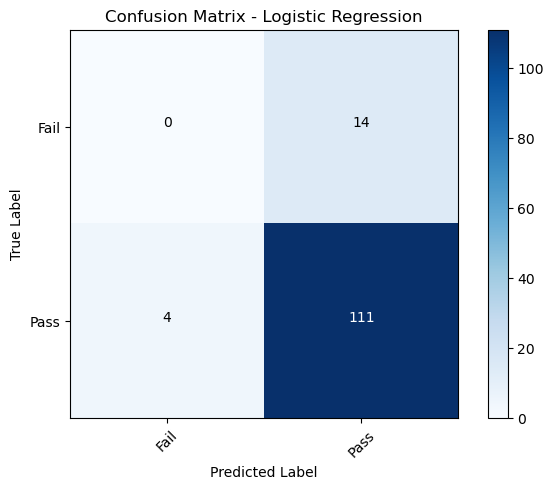

In [58]:
# Creating our confusion matrix:
cnf_matrix_logReg = confusion_matrix(y_test, logRegCVSD.\
                              predict(X_test_standardized))

# Plotting our confusion matrix:
plt.figure()
plot_confusion_matrix(cnf_matrix_logReg, \
                      classes=['Fail', 'Pass'], \
                      title='Confusion Matrix - Logistic Regression')

Interestingly, our logistic regression model made 14 false positive predictions (i.e., predictions that a given student passed the course when they in fact failed it), four false negative predictions (i.e., predictions that a given student failed the course when they in fact passed it), and zero true negative predictions (i.e., correct predictions that a given student would fail the course).

Visual analysis of the confusion matrix seems to suggest that our logistic regression model is over-inclined toward predicting course passage. Perhaps a classification report might shed more light on the situation and reveal new insights. We use the `classification_report()` function to generate our classification report:

In [59]:
print(classification_report(y_test, \
                            logRegCVSD.predict(X_test_standardized)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.89      0.97      0.92       115

    accuracy                           0.86       129
   macro avg       0.44      0.48      0.46       129
weighted avg       0.79      0.86      0.82       129



Perhaps most astonishingly, the precision, recall, and f1-score values for 0-class predictions made by our logistic regression model are all zero _because our model did not make a single correct prediction as to who would fail the Portuguese course._ This being said, it is perhaps worth noting that our model _did_ exhibit a recall for 1-class predictions of approximately 97% (i.e., of those students who _would_ end up passing the course, the model correctly predicted almost 97% of them).

In brief summation: our model is highly-effective at correctly predicting course passage, but performs dismally when it comes to predicting course failure.

### Model Performance Evaluation - _Decision Tree_

Just as we did in our logistic regression workflow, we will now compare our decision tree's accuracy on the _training_ and _testing_ datasets:

In [60]:
# Finding our decision tree's predictive accuracy when applied to
# the training data-containing DataFrame bound to the variable name
# "X_train_dTree":
train_data_accuracy_dTree = accuracy_score(bT.predict(X_train_dTree),\
                                           y_train_dTree)

# Finding our decision tree's predictive accuracy when applied to
# the testing data-containing DataFrame bound to the variable name
# "X_test_dTree":
test_data_accuracy_dTree = accuracy_score(bT.predict(X_test_dTree),\
                                          y_test_dTree)

print('The accuracy on the training data is {:.2f}%'.format\
      (train_data_accuracy_dTree*100))
print('The accuracy on the testing data is {:.2f}%'.format\
      (test_data_accuracy_dTree*100))

The accuracy on the training data is 87.72%
The accuracy on the testing data is 86.05%


While our decision tree model model _does_ exceed the baseline predictive accuracy of 83.62%, there is evidence that our decision tree, just like our logistic regression model, is _overfitting_ on the training dataset in that the decision tree's predictive accuracy on the training dataset is slightly higher than its predictive accuracy when applied to the testing dataset. _Of particular note is that our decision tree's predictive accuracy when applied to the testing dataset is ___exactly the same___ as our logistic regression model's predictive accuracy when applied to its testing dataset._

Since our decision tree model's predictive accuracy _does_ exceed the baseline predictive accuracy (even if by only roughly 2.5%) when applied to the testing dataset, the case can be made - just as it was with our logistic regression model - that the model _does_ provide a miniscule predictive improvement over a hypothetical "model" that simply predicts that every student described in "student-por.csv" will pass the course.

The `plot_confusion_matrix()` function already having been defined earlier in this section, we can now move to creating and examining a confusion matrix for our decision tree model:

Confusion matrix, without normalization
[[  2  12]
 [  6 109]]


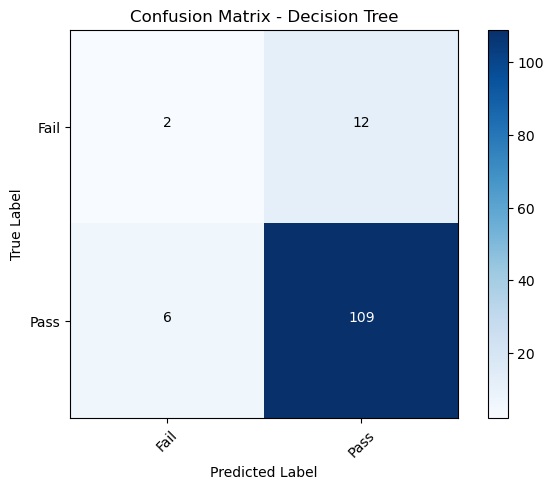

In [61]:
# Creating our confusion matrix:
cnf_matrix_dTree = confusion_matrix(y_test_dTree, bT.\
                              predict(X_test_dTree))

# Plotting our confusion matrix:
plt.figure()
plot_confusion_matrix(cnf_matrix_dTree, \
                      classes=['Fail', 'Pass'], \
                      title='Confusion Matrix - Decision Tree')

Our decision tree model made 12 false positive predictions (i.e., predictions that a given student passed the course when they in fact failed it), six false negative predictions (i.e., predictions that a given student failed the course when they in fact passed it), and two true negative predictions (i.e., correct predictions that a given student would fail the course).

The decision tree appears to be _marginally_ better at predicting students who will fail the course than our logistic regression model, but considering how our logistic regression model made ___zero___ correct course failure predictions, this is not exactly an improvement worth "writing home about", so to speak.

As was the case with our logistic regression model, visual analysis of the confusion matrix for our decision tree model seems to suggest that the model is over-inclined toward predicting course passage.

Let's generate a classification report using the `classification_report()` function to dig deeper into our decision tree model's predictions:

In [62]:
print(classification_report(y_test_dTree, bT.predict(X_test_dTree)))

              precision    recall  f1-score   support

           0       0.25      0.14      0.18        14
           1       0.90      0.95      0.92       115

    accuracy                           0.86       129
   macro avg       0.58      0.55      0.55       129
weighted avg       0.83      0.86      0.84       129



Unsurprisingly, the precision, recall, and f1-score values for 0-class predictions made by our logistic regression model are all quite low when compared to the values for the same metrics for 1-value class predictions: indeed, our decision tree model _did_ exhibit a recall for 1-class predictions of approximately 95% (i.e., of those students who _would_ end up passing the course, the model correctly predicted almost 95% of them), which might be considered impressive.

Just as was the case for our logistic regression model, our decision tree model is highly-effective at correctly predicting course passage, but performs dismally when it comes to predicting course failure.

Let's perform a quick experiment: since our input dataset is so remarkably imbalanced toward course passage, what if we were to adjust the sorting threshold for each leaf in our decision tree model from 0.5 to 0.8? Perhaps this could improve our decision tree’s odds of better-predicting course failures:

Confusion matrix, without normalization
[[ 9  5]
 [20 95]]
              precision    recall  f1-score   support

           0       0.31      0.64      0.42        14
           1       0.95      0.83      0.88       115

    accuracy                           0.81       129
   macro avg       0.63      0.73      0.65       129
weighted avg       0.88      0.81      0.83       129



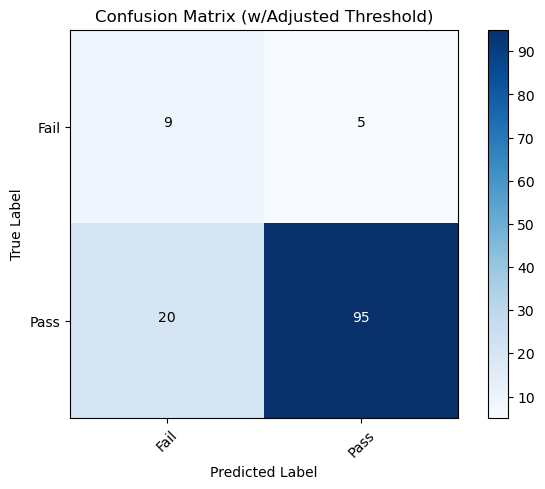

In [63]:
# Obtaining the predicted probabilities for each class - "pass" or
# "fail" - for each student represented in our testing dataset and
# outputting them to "predicted_probs"; note that the first column
# in the array outputted from our call of the `predict_proba()`
# function is our decision tree's outputted probability for the
# "fail" class for each student represented in the "X_test_dTree"
# DataFrame (and the second column in this array is our decision
# tree's outputted probability for the "pass" class for each student
# represented in the testing dataset):
predicted_probs = bT.predict_proba(X_test_dTree)

# Retrieving (and copying) the values in the second column (i.e., the
# probability for each student of passing the course) in the
# "predicted_probs" array and storing the output in "y_pred":
y_pred = predicted_probs[:, 1].copy()
# Wherever the value in the "y_pred" array is greater than or equal
# to 0.8, we set that value equal to 1 (in effect classifying any
# "pass" probability at or above 0.8 as a course passage):
y_pred[y_pred >= 0.8] = 1
# Wherever the value in the "y_pred" array is less than 1, we set
# that value equal to 0 (in effect classifying any value in "y_pred"
# less than 1 as a course failure):
y_pred[y_pred < 1] = 0

# Computing our threshold-adjusted decision tree's confusion matrix:
cnf_matrix_dTree_tH = confusion_matrix(y_test_dTree, y_pred)

# Plotting our threshold-adjusted decision tree's confusion matrix:
plt.figure()
plot_confusion_matrix(cnf_matrix_dTree_tH, classes=["Fail", "Pass"],
                     title="Confusion Matrix (w/Adjusted Threshold)")

# Printing our threshold-adjusted decision tree's classification
# report:
print(classification_report(y_test_dTree, y_pred))

Our experiment has yielded some impressive results:
- The recall for 0-class predictions has ___more than quadrupled___ from the recall value for our original decision tree model;
- The f1-score for 0-class predictions has ___more than doubled___ from the same metric value for our original decision tree model; and
- Precision for 1-class predictions has increased from 0.90 to 0.95.

The metric growth listed above has been achieved at manageable expense to the threshold-adjusted decision tree model's 1-class predictions:
- Recall has decreased from 0.95 to 0.83; and
- F1-score has decreased from 0.92 to 0.88.

This being said, the overall accuracy of the decision tree model has reduced from around 86% to approximately 81% (i.e., ((9+95)/9+5+20+95) - ___lower than our baseline predictive accuracy of 83.62%___. _Such a decrease in overall predictive accuracy __may__ be preferable if the intended purpose of the threshold-adjusted model were, say, to better identify those students at risk of failing the course._ However, since our intended purpose for the decision tree model is to predict _course passage_, we will conclude - in the interest of keeping this Notebook as concise as possible - this exploration of how threshold adjustment can make our decision tree better-predictive of course failure without making any changes to our original decision tree model.

Lastly, let's calculate and visualize the ROC curve for our decision tree model to examine the recall-false positive trade-off:

In [64]:
# Passing, to the `roc_curve()` function, the true predictand values
# from the "y_test_dTree" DataFrame, as well as the predicted prob-
# abilities for the "pass" class (stored within "predicted_probs");
# running this code cell returns the false-positive rate (bound to
# the variable name "fpr") and the recall rate (bound to the vari-
# able name "recall") for all thresholds (bound to the variable name
# "thresholds"):
fpr, recall, thresholds = roc_curve(y_test_dTree, \
                                    predicted_probs[:, 1])

Text(0.5, 1.0, 'ROC Curve')

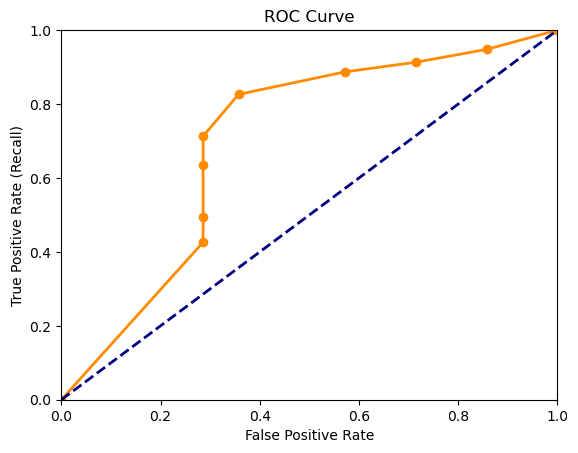

In [65]:
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, recall, color='darkorange', lw=2, linestyle='-', \
        marker='o')
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate (Recall)')
ax.set_title('ROC Curve')

In [66]:
# Outputting our threshold, false positive rate, and recall rate
# values:
print(thresholds)
print(fpr)
print(recall)

[2.         1.         0.975      0.93478261 0.8974359  0.87804878
 0.75609756 0.68292683 0.6        0.37837838]
[0.         0.28571429 0.28571429 0.28571429 0.28571429 0.35714286
 0.57142857 0.71428571 0.85714286 1.        ]
[0.         0.42608696 0.49565217 0.63478261 0.71304348 0.82608696
 0.88695652 0.91304348 0.94782609 1.        ]


Looking at our ROC curve visualization, it appears that our decision tree model's recall rate would be optimized at a threshold value of 0.87804878 (which would keep the false positive rate relatively under control at a value of 0.35714286). Incidentally, the 0.87804878 threshold value is close in value to the 0.8 threshold value we used during our threshold-adjustment experimentation.

It is likely the case that the optimum threshold is so high because our input dataset, as previously noted, is highly imbalanced toward course passage. While adjusting the threshold to 0.87804878 _would_ optimize the recall rate for our decision tree, doing so would come at the cost of accurate predictions of course passage (our decision tree model's purpose being to accurately predict as many course _passages_ as possible).

## Step 6: Describe and Interpret the Model

The obvious "elephant in the room" is the highly-imbalanced nature of the input dataset in terms of the amount of students passing the Portuguese course. Because the course passage rate is already so high (~84%), it is difficult given the relatively small sample size of 649 records to create a classification model that would be signifcantly more-accurate than a hypothetical "model" that simply predicts every single student described in "student-por.csv" will pass the course.

### Model Description and Interpretation - _Logistic Regression_

Having a better understanding of which features in our logistic regression model were "allowed" post-regularization to have a measurable effect (as demonstrated by a non-zero value for a specific feature's coefficient) can help us to understand which student-specific attributes had predictive power:

In [67]:
# Printing out the names of the features that correspond to our
# model's non-zero coefficients (notice the use of the `zip()`
# function, as well):
for coef, col in zip(logRegCVSD.coef_[0], \
                     X_train_standardized.columns):
    if coef != 0:
        print('{:.3f} * {}'.format(coef, col))

-0.470 * failures
-0.025 * freetime
-0.059 * Walc
-0.121 * absences
-0.446 * school_MS
-0.011 * Fjob_services
0.019 * reason_reputation
-0.052 * guardian_mother
0.358 * higher_yes


Scrutinization of the effect-bearing features in our logistic regression model appear to support some of the inferences we made during data exploration. Some of the most obvious revelations include:
- Students' previous failure(s) of the Portuguese course exhibiting a strong negative correlation with those same students' probabilities of passing the course on future retakes;
- Each absence from the Portuguese course decreasing a student's odds of passing;
- Those students attending the "Mousinho da Silveira" (i.e., "MS") school being significantly more likely to fail the Portuguese course (recall from data exploration that we observed that students at Mousinho da Silveira were nearly __four times__ as likely to fail the Portuguese course than those students who attended the "Gabriel Peralta" (i.e., "GP") school); and
- The significant _positive_ correlation between a given student's expressed interest in pursuing higher education and their probability of course passage.

Softer _negative_ correlations could also be seen between course passage and a given student's "free time", weekend alcohol consumption, their mother's working in "services", and their identification of their mother as their "guardian". The lone positive correlation enshrined within the model (aside from the connection between course passage and a given student's expressed interest in higher education) was between course passage and a given student's having selected their school on the basis of reputation.

Keeping in mind the observed correlations that have been built into our logistic regression model, the following insights might be gleaned from our efforts:
- Campaigns promoting reduction of weekend alcohol consumption by students might be _marginally_ helpful in reducing course failure rates;
- Deep analysis of the Portuguese course offered at Mousinho da Silveira may reveal further insights as to why the course's failure rate is, comparatively speaking, so high (e.g., unreasonably difficult/insufficiently challenging curriculum, poor pedagogical approach, course being offered at a time of day when most students are losing the ability to concentrate, etc.) and how any issues found might be addressed to students' benefit; and
- Promotion of the benefits of higher education (e.g., higher salaries, (potentially) higher career satisfaction, etc.) to students may, _likely marginally at best_, motivate more students to strive for course passage and/or earning a higher grade in the course - _even if those students ultimately choose against pursuing higher education at a later date_.

These insights being proposed, it is worth noting that the strongest negative correlations embedded within our model - that of previous course failures and students' choice of Mousinho da Silveira as their school - are not as easy to reverse (at least over the short-term). After all, once a student has failed a course, they cannot simply "un-fail" it. The most obvious simple means of reducing course failures would likely be to alter the Portuguese course's curriculum or to otherwise change student perception about alcohol consumption and higher education, as noted above (deeper analysis of course curriculum, as alluded to above, would be necessary beforehand, and analysis of student incentive-based thinking would likely be helpful in driving any effort to change student perceptions). In regard to reducing the negative correlation between course passage and students' choice of Mousinho da Silveira as their school, such a "choice" may not be much of a choice at all: for all we know, most students may be seeking to matriculate at the Gabriel Peralta school, but places are highly limited, perhaps leading to students choosing between Mousinho da Silveira and other, lower-performing schools on the basis of "reputation". More information and subsequent analysis would be needed regarding this school selection process before any cogent statements could be made as to reducing this negative correlation.

Overall, our logistic regression model, while still exhibiting a higher predictive accuracy than the 83.62% baseline accuracy for the "student-por.csv" dataset, is unlikely to have real practical use since the dataset's baseline accuracy is already so high in relative terms. While the model _does_ exhibit strong recall in predicting course passage, it seems fundamentally incapable of properly forecasting course failures, and as such adds little practical value to, for example, any efforts to proactively identify students at risk for course failure so that preemptive corrective action might be taken to increase their chances of course passage. Rather, it may be argued that the model's practical value lies not in its use on "live" data, but in the insights revealed by examining its coefficients as we did in the several Markdown cells preceding this one.

### Model Description and Interpretation - _Decision Tree_

Knowing the particular features along which our decision tree model split might help us to better understand the model's choice-making process. We can use the `export_graphviz()` function to export our decision tree to Graphviz, which allows us to convert the representation of our decision tree from DOT format to a .png file:

In [68]:
# Exporting our "bT" decision tree model to DOT format and then out-
# putting the DOT-formatted decision tree model to the string bound
# to the variable name "graphiv_string"; passing `None` to the `out-
# _file` keyword argument becaise we want to return our DOT-formatted
# decision tree model to the "graphiv_string" string); `True` is
# assigned to the `filled` keyword argument so that each node in our
# decision tree, when converted into an image representation, is
# filled with a color; assigning `True` to the `rounded` keyword 
# argument to make sure that each node in the image representation
# of our decision tree is a rectangle with rounded corners as opposed
# to right-angular corners:
graphiv_string = export_graphviz(bT, out_file=None, \
                                 filled=True, rounded=True,
                                 feature_names=X_train_dTree.columns)

# Converting the string to an image represenation and storing
# it in the `.graphviz.Source` object bound to the variable name
# "graph":
graph = graphviz.Source(graphiv_string, format='png')

# Saving, using the `.render()` method, the image representation of
# our decision tree bound to the variable name "graph" as "bT" in
# the current working directory:
image_savepath = os.path.join(os.getcwd(), "bT")
graph.render(image_savepath)

'/Users/Reid/Software_Development_Projects/End-Of-CourseProject_LogisticRegressionAndDecisionTreeModeling/Git_Repository/End-Of-CourseProject_LogisticRegressionAndDecisionTreeModeling/bT.png'

Our decision tree appears as seen below:

![bT.png](bT.png)

Starting at the very top of our decision tree visualization, we can see that, unsurprisingly, the initial split was made on the "failures" feature. In particular, any student recorded as having a previous failure of the Portuguese course was immediately considered to be at higher odds of repeat course failure. Of those who had previously failed the Portuguese course, those who attended the "Mousinho da Silveira" (i.e., "MS") school were deemed highly likely to fail the course. Aside from the "families" and "school_MS" features, it seems that the major feature upon which our model split was the "higher_yes" feature, with those students recorded as having interest in pursuing higher education having higher odds of course passage compared to those with no expressed interest in pursuing higher education.

As was the case with the description/interpretation of our logistic regression model, scrutinization of our decision tree model appears to support/build upon inferences we made during data exploration, including:
- Students' previous failure(s) of the Portuguese course exhibiting a strong negative correlation with those same students' probabilities of passing the course on future retakes;
- Those students attending the "Mousinho da Silveira" (i.e., "MS") school being significantly more likely to fail the Portuguese course (recall from data exploration that we observed that students at Mousinho da Silveira were nearly __four times__ as likely to fail the Portuguese course than those students who attended the "Gabriel Peralta" (i.e., "GP") school); and
- The significant _positive_ correlation between a given student's expressed interest in pursuing higher education and their probability of course passage.

Observing the splits made by our decision tree model, the following insights might be gleaned from our efforts:
- Deep analysis of the Portuguese course offered at Mousinho da Silveira may reveal further insights as to why the course's failure rate is, comparatively speaking, so high (e.g., unreasonably difficult/insufficiently challenging curriculum, poor pedagogical approach, course being offered at a time of day when most students are losing the ability to concentrate, etc.) and how any issues found might be addressed to students' benefit; and
- Promotion of the benefits of higher education (e.g., higher salaries, (potentially) higher career satisfaction, etc.) to students may, _likely marginally at best_, motivate more students to strive for course passage and/or earning a higher grade in the course - _even if those students ultimately choose against pursuing higher education at a later date_.

_Note that while these decision tree-sourced insights are the same as what came from description/interpretation of our logistic regression model, our logistic regression model provided greater visibility into the effect that more minor features (e.g., "Walc", "freetime", etc.) were found to have on student success in the Portuguese course._

As we previously noted while describing/interpreting our logistic regression model, the strongest negative correlations embedded within our model - that of previous course failures and students' choice of Mousinho da Silveira as their school - are not as easy to reverse (at least over the short-term). After all, once a student has failed a course, they cannot simply "un-fail" it. The most obvious simple means of reducing course failures would likely be to alter the Portuguese course's curriculum or to otherwise change student perception about higher education, as noted above (deeper analysis of course curriculum, as alluded to above, would be necessary beforehand, and analysis of student incentive-based thinking would likely be helpful in driving any effort to change student perceptions). In regard to reducing the negative correlation between course passage and students' choice of Mousinho da Silveira as their school, such a "choice" may not be much of a choice at all: for all we know, most students may be seeking to matriculate at the Gabriel Peralta school, but places at Gabriel Peralta could be severely limited, perhaps leading to students choosing between Mousinho da Silveira and other, lower-performing schools on the basis of "reputation". More information and subsequent analysis would be needed as to this school selection process before any cogent statements could be made as to reducing this negative correlation.